In [ ]:
Problem Statement:
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have 
collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. 
You need to design a system that predicts the fare amount for a cab ride in the city.

In [1]:
from platform import python_version
print(python_version()) #??????

3.6.10


In [2]:
#!/usr/bin/env python
#!pip install "library name"  # install relevent libraries with this command.
# Importing required libraries. 

import os # input and output operations
import numpy as np # used for data analysis
import pandas as pd # for data manipulation and analysis
import warnings
from collections import Counter# used to keep track of elements and their count
from datetime import datetime
from math import sin, cos, sqrt, atan2, radians # to calculculate distance from latitude and longitude
from scipy.stats import chi2_contingency
from random import randrange, uniform
#from fancyimpute import KNN # For KNN imputation
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import KNNImputer
# For data visualizations 
import matplotlib.pyplot as plt # used for data visualizations
import seaborn as sns # used for data visualizations

# For rendering the plots in jupyter notebook
%matplotlib inline

In [3]:
# Set working directory

os.chdir("C:/Users/Rahul")
print(os.getcwd())

C:\Users\Rahul


In [6]:
#Load training data
train_cab = pd.read_csv("train_cab.csv") 

# let's preview the training data
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
#Load test data
test_cab = pd.read_csv("test.csv") 

# Let's Preview the test data
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
print("Shape of training data is: ",train_cab.shape) #checking the number of rows and columns in training data
print("Shape of test data is: ",test_cab.shape) #checking the number of rows and columns in test data

Shape of training data is:  (16067, 7)
Shape of test data is:  (9914, 6)


In [9]:
# Let's Check for data types of train data:
train_cab.info()

# In train data observed that fare_amount and pickup_datetime variables are of object type. 
# So, Need to convert fare_amount datatype to 'numeric' & pickup_datetime data type to 'datatime' format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [10]:
# Let's Check for data types of test data:
test_cab.info() 

# In test data observed that pickup_datetime variable is of object type. 
# So, Need to convert it to datatime format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [11]:
# Let's understand basic statistics of each (numeric & non-numeric) variables in train data
train_cab.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043,16067,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
unique,468,16021,NaN,NaN,NaN,NaN,NaN
top,6.5,2009-04-18 20:44:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,759,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,NaN,NaN,10.578384,6.826587,10.575062,6.187087,60.844122
min,NaN,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,NaN,NaN,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,NaN,NaN,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,NaN,NaN,-73.966838,40.767381,-73.963643,40.768013,2.000000


In [12]:
# Let's understand basic statistics of each (numeric & non-numeric) variables in test data

test_cab.describe(include='all')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,1753,NaN,NaN,NaN,NaN,NaN
top,2011-12-13 22:00:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,NaN,NaN
mean,NaN,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,NaN,0.042774,0.033541,0.039072,0.035435,1.278747
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,NaN,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,NaN,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,NaN,-73.968013,40.767113,-73.964059,40.768757,2.000000


In [13]:
# Now Convert fare_amount data type from object to numeric type.
train_cab["fare_amount"] = pd.to_numeric(train_cab["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [14]:
# Here pickup_datetime variable is an object data type so we need to convert it's data type to datetime format.
# Note: when we tried to convert pickup_datetime variable to datetime format it was thrown an error saying :
# "ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC' (match)". So, to rectify the same
# Methos 1- Treat that observation with NA and then drop that observation or 
# Methos 2- Remove that observation itself as we donot have correct observation in datetime.

train_cab.loc[train_cab['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan

#dropping NA values in pickup_datetime Variable
train_cab = train_cab.drop(train_cab[train_cab['pickup_datetime'].isnull()].index, axis = 0)
train_cab['pickup_datetime'] =  pd.to_datetime(train_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [15]:
### Derive separate fields like year, month, date, day of the week, hour and minutes from the pickup_datetime Variable. 

train_cab['Year'] = train_cab['pickup_datetime'].dt.year
train_cab['Month'] = train_cab['pickup_datetime'].dt.month
train_cab['Date'] = train_cab['pickup_datetime'].dt.day
train_cab['Dayofweek'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour'] = train_cab['pickup_datetime'].dt.hour
train_cab['Minutes'] = train_cab['pickup_datetime'].dt.minute
train_cab['Seconds'] = train_cab['pickup_datetime'].dt.second

In [16]:
# Now that we have extracted relevant information from pickup-datetime variable remove this variable from the train dataset.
train_cab = train_cab.drop(columns=['pickup_datetime'])
train_cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,0


In [17]:
# Only variable in test data set which is of object type is pickup_datetime. Need to convert it to datetime format.
# then will separate fields like year, month, date, day of the week, hour and minutes.
test_cab['pickup_datetime'] =  pd.to_datetime(test_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [18]:
test_cab['Year'] = test_cab['pickup_datetime'].dt.year
test_cab['Month'] = test_cab['pickup_datetime'].dt.month
test_cab['Date'] = test_cab['pickup_datetime'].dt.day
test_cab['Dayofweek'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['Hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['Minutes'] = test_cab['pickup_datetime'].dt.minute
test_cab['Seconds'] = test_cab['pickup_datetime'].dt.second

In [19]:
# Now that we have extracted relevant information from pickup-datetime variable remove this variable from the test dataset.
test_cab = test_cab.drop(columns=['pickup_datetime'])
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,24
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,24
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,44
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,12
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,12


In [20]:
# Now our test dataset has all relevant data types
test_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
Year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Dayofweek            9914 non-null int64
Hour                 9914 non-null int64
Minutes              9914 non-null int64
Seconds              9914 non-null int64
dtypes: float64(4), int64(8)
memory usage: 929.6 KB


In [21]:
# Now our training dataset has all relevant data types for further analysis
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16066 entries, 0 to 16066
Data columns (total 13 columns):
fare_amount          16041 non-null float64
pickup_longitude     16066 non-null float64
pickup_latitude      16066 non-null float64
dropoff_longitude    16066 non-null float64
dropoff_latitude     16066 non-null float64
passenger_count      16011 non-null float64
Year                 16066 non-null int64
Month                16066 non-null int64
Date                 16066 non-null int64
Dayofweek            16066 non-null int64
Hour                 16066 non-null int64
Minutes              16066 non-null int64
Seconds              16066 non-null int64
dtypes: float64(6), int64(7)
memory usage: 1.7 MB


In [22]:
# Check for missing values present in whole training datset.

print("\n The missing value percentage in training data :")

#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_cab.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

#Calculate new variable missing value percentage
missing_val['Missing_Value_Percentage'] = (missing_val.Missing_values/len(train_cab))*100

#descending order
missing_val = missing_val.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)
missing_val

# Observed that passenger_count and fare_amount variables has some missing values.


 The missing value percentage in training data :


,Variables,Missing_values,Missing_Value_Percentage
0,passenger_count,55,0.342338
1,fare_amount,25,0.155608
2,pickup_longitude,0,0.000000
3,pickup_latitude,0,0.000000
4,dropoff_longitude,0,0.000000
5,dropoff_latitude,0,0.000000
6,Year,0,0.000000
7,Month,0,0.000000
8,Date,0,0.000000
9,Dayofweek,0,0.000000


In [23]:
# Check for missing values present in whole test datset.

print("\n The missing value percentage in test datatest :")

#Create dataframe with missing percentage
missing_valt = pd.DataFrame(test_cab.isnull().sum())

#Reset index
missing_valt = missing_valt.reset_index()

#Rename variable
missing_valt = missing_valt.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

#Calculate new variable missing value percentage
missing_valt['Missing_Value_Percentage'] = (missing_valt.Missing_values/len(test_cab))*100

#descending order
missing_valt = missing_valt.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)


 The missing value percentage in test datatest :


In [24]:
missing_valt

,Variables,Missing_values,Missing_Value_Percentage
0,pickup_longitude,0,0.0
1,pickup_latitude,0,0.0
2,dropoff_longitude,0,0.0
3,dropoff_latitude,0,0.0
4,passenger_count,0,0.0
5,Year,0,0.0
6,Month,0,0.0
7,Date,0,0.0
8,Dayofweek,0,0.0
9,Hour,0,0.0


In [25]:
#imputation method testing
#Actual value = 6.9 (70th),5.0(60th),9.7(50th) 
#Mean = 15.0055, 15.0057, 15.0089------ Mean in not a suitable method for our dataset missing value imputation
#Median = 8.5, 8.5, 8.5 ---------------  Median in an approximate method for our dataset missing value imputation
#KNN = 10.128, 7.4668, 9.333-----------   kNN in an ideal method for our dataset missing value imputation 

#create missing value
#train_cab['fare_amount'].loc[50] = np.nan
#train_cab['fare_amount'].loc[50] 

In [26]:
#Impute with mean
#train_cab['fare_amount'] = train_cab['fare_amount'].fillna(train_cab['fare_amount'].mean())
#train_cab['passenger_count'] = train_cab['passenger_count'].fillna(train_cab['passenger_count'].mean())

#Impute with median
#train_cab['fare_amount'] = train_cab['fare_amount'].fillna(train_cab['fare_amount'].median())
#train_cab['passenger_count'] = train_cab['passenger_count'].fillna(train_cab['passenger_count'].median())

In [27]:
#Apply KNN imputation algorithm
impute=KNNImputer(n_neighbors=2)
train_cab=pd.DataFrame(impute.fit_transform(train_cab))

In [28]:
print("\n The missing value percentage in training data :")

#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_cab.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

#Calculate new variable missing value percentage
missing_val['Missing_Value_Percentage'] = (missing_val.Missing_values/len(train_cab))*100

#descending order
missing_val = missing_val.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)
missing_val


 The missing value percentage in training data :


,Variables,Missing_values,Missing_Value_Percentage
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
5,5,0,0.0
6,6,0,0.0
7,7,0,0.0
8,8,0,0.0
9,9,0,0.0


In [29]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16066 entries, 0 to 16065
Data columns (total 13 columns):
0     16066 non-null float64
1     16066 non-null float64
2     16066 non-null float64
3     16066 non-null float64
4     16066 non-null float64
5     16066 non-null float64
6     16066 non-null float64
7     16066 non-null float64
8     16066 non-null float64
9     16066 non-null float64
10    16066 non-null float64
11    16066 non-null float64
12    16066 non-null float64
dtypes: float64(13)
memory usage: 1.6 MB


In [30]:
####################outler Analysis#############
train_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
0,16066.0,15.011231,430.139368,-3.000000,6.000000,8.500000,12.500000,54343.000000
1,16066.0,-72.462693,10.578707,-74.438233,-73.992156,-73.981697,-73.966837,40.766125
2,16066.0,39.914675,6.826797,-74.006893,40.734935,40.752605,40.767381,401.083332
3,16066.0,-72.462233,10.575384,-74.429332,-73.991182,-73.980170,-73.963642,40.802437
4,16066.0,39.897852,6.187276,-74.006377,40.734647,40.753566,40.768015,41.366138
5,16066.0,2.621257,60.741828,0.000000,1.000000,1.000000,2.000000,5345.000000
6,16066.0,2011.730860,1.864275,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
7,16066.0,6.260612,3.447727,1.000000,3.000000,6.000000,9.000000,12.000000
8,16066.0,15.669862,8.683210,1.000000,8.000000,16.000000,23.000000,31.000000
9,16066.0,3.032615,1.968929,0.000000,1.000000,3.000000,5.000000,6.000000


In [31]:
test_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,9914.0,-73.974722,0.042774,-74.252193,-73.992501,-73.982326,-73.968013,-72.986532
pickup_latitude,9914.0,40.751041,0.033541,40.573143,40.736125,40.753051,40.767113,41.709555
dropoff_longitude,9914.0,-73.973657,0.039072,-74.263242,-73.991247,-73.980015,-73.964059,-72.990963
dropoff_latitude,9914.0,40.751743,0.035435,40.568973,40.735254,40.754065,40.768757,41.696683
passenger_count,9914.0,1.671273,1.278747,1.000000,1.000000,1.000000,2.000000,6.000000
Year,9914.0,2011.815816,1.803347,2009.000000,2010.000000,2012.000000,2014.000000,2015.000000
Month,9914.0,6.857979,3.353272,1.000000,4.000000,7.000000,10.000000,12.000000
Date,9914.0,16.194170,8.838482,1.000000,9.000000,16.000000,25.000000,31.000000
Dayofweek,9914.0,2.852834,1.994451,0.000000,1.000000,3.000000,5.000000,6.000000
Hour,9914.0,13.467420,6.868584,0.000000,8.000000,15.000000,19.000000,23.000000


In [32]:
train_cab.columns=['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date',
       'Dayofweek', 'Hour', 'Minutes', 'Seconds']
train_cab

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,21.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,42.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0,0.0
16062,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0,0.0
16063,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0,7.0
16064,8.1,-73.957027,40.765945,-73.981983,40.779560,1.0,2010.0,5.0,11.0,1.0,23.0,53.0,0.0


In [33]:
#When we look at basic statistics of train data min and max values found that there is high variation training data. Also seen mean of all variables.
## Lets Check it, whether The fare amount variable has any Zero or neagative values.

Counter(train_cab['fare_amount']< 1)

Counter({False: 16061, True: 5})

In [34]:
# Remove the rows where fare amount has zero or negative values.

train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]<1].index, axis=0)
train_cab.shape

(16061, 13)

In [35]:
#In a cab maximum allowable passengers is 6 considered XUV500 vehicle for cab service (6 passenger +1 Driver).

Counter(train_cab['passenger_count'] > 6)

Counter({False: 16041, True: 20})

In [36]:
Counter(test_cab['passenger_count'] > 6)

Counter({False: 9914})

In [37]:
# Remove the rows where passenger count has greater than 6.

train_cab = train_cab.drop(train_cab[(train_cab['passenger_count'] > 6)].index, axis=0)
train_cab.shape

(16041, 13)

In [38]:
# Practically Passenger Count can't be in fraction or less than 1. Lets cross check the same.

Counter(train_cab['passenger_count'] < 1)

Counter({False: 15983, True: 58})

In [39]:
Counter(test_cab['passenger_count'] < 1)

Counter({False: 9914})

In [40]:
# Remove the rows where passenger count has fractional value or less than 1.

train_cab = train_cab.drop(train_cab[(train_cab['passenger_count'] < 1)].index, axis=0)
train_cab.shape

(15983, 13)

In [41]:
# As we observe that Passenge_count variable has fractional values, but it should be whole number hence Need to round them to integer.
train_cab.loc[:,'passenger_count'] = train_cab.loc[:,'passenger_count'].round()

In [42]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15983 entries, 0 to 16065
Data columns (total 13 columns):
fare_amount          15983 non-null float64
pickup_longitude     15983 non-null float64
pickup_latitude      15983 non-null float64
dropoff_longitude    15983 non-null float64
dropoff_latitude     15983 non-null float64
passenger_count      15983 non-null float64
Year                 15983 non-null float64
Month                15983 non-null float64
Date                 15983 non-null float64
Dayofweek            15983 non-null float64
Hour                 15983 non-null float64
Minutes              15983 non-null float64
Seconds              15983 non-null float64
dtypes: float64(13)
memory usage: 1.7 MB


In [43]:
test_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 12 columns):
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
Year                 9914 non-null int64
Month                9914 non-null int64
Date                 9914 non-null int64
Dayofweek            9914 non-null int64
Hour                 9914 non-null int64
Minutes              9914 non-null int64
Seconds              9914 non-null int64
dtypes: float64(4), int64(8)
memory usage: 929.6 KB


In [44]:
# Get all column names
train_cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes', 'Seconds'],
      dtype='object')

In [45]:
print("Shape of training data initial exploration is: ",train_cab.shape) 
print("Shape of test data initial exploration is: ",test_cab.shape)

Shape of training data initial exploration is:  (15983, 13)
Shape of test data initial exploration is:  (9914, 12)


In [46]:
test_cab.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date',
       'Dayofweek', 'Hour', 'Minutes', 'Seconds'],
      dtype='object')

In [47]:
# user defined function that will plot boxplot and distribution for four columns of dataset
from scipy.stats import norm

# As we have 12 variables in our train data set let's write a function which receives 4 variables at a time to display plots:

def histogram_and_box_plots(Var1, Var2, Var3, Var4, dataframe, bin1=50, bin2=50, bin3=50, bin4 =50, sup ="    "): 
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize= (16,8))
    super_title = fig.suptitle("Boxplot and Histogram: "+sup, fontsize=20)
    plt.tight_layout()
    sns.boxplot(y = Var1, data = dataframe, ax = ax[0][0])
    sns.boxplot(y = Var2, data = dataframe, ax = ax[0][1])
    sns.boxplot(y = Var3, data = dataframe, ax = ax[0][2])
    sns.boxplot(y = Var4, data = dataframe, ax = ax[0][3])
    sns.distplot(dataframe[Var1], kde=True, ax = ax[1][0], bins = bin1, fit=norm)
    sns.distplot(dataframe[Var2], kde=True, ax = ax[1][1], bins = bin2, fit=norm)
    sns.distplot(dataframe[Var3], kde=True, ax = ax[1][2], bins = bin3, fit=norm)
    sns.distplot(dataframe[Var4], kde=True, ax = ax[1][3], bins = bin4, fit=norm)
    fig.subplots_adjust(top = 0.9)
    plt.show()

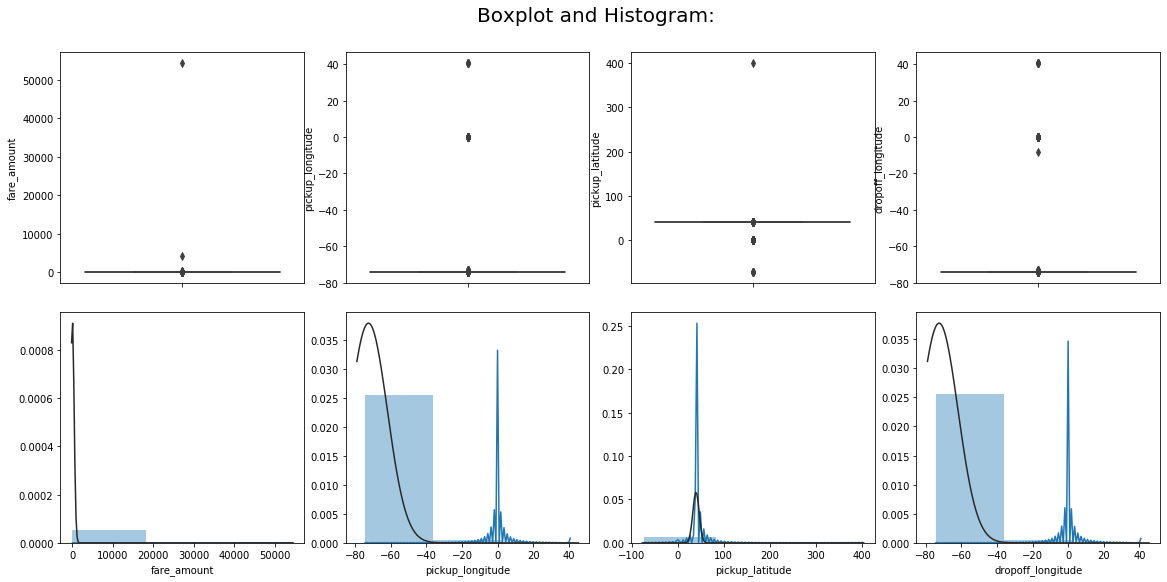

In [48]:
# plotting boxplot and histogram for numerical variables in train dataset
histogram_and_box_plots('fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude',dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" ")

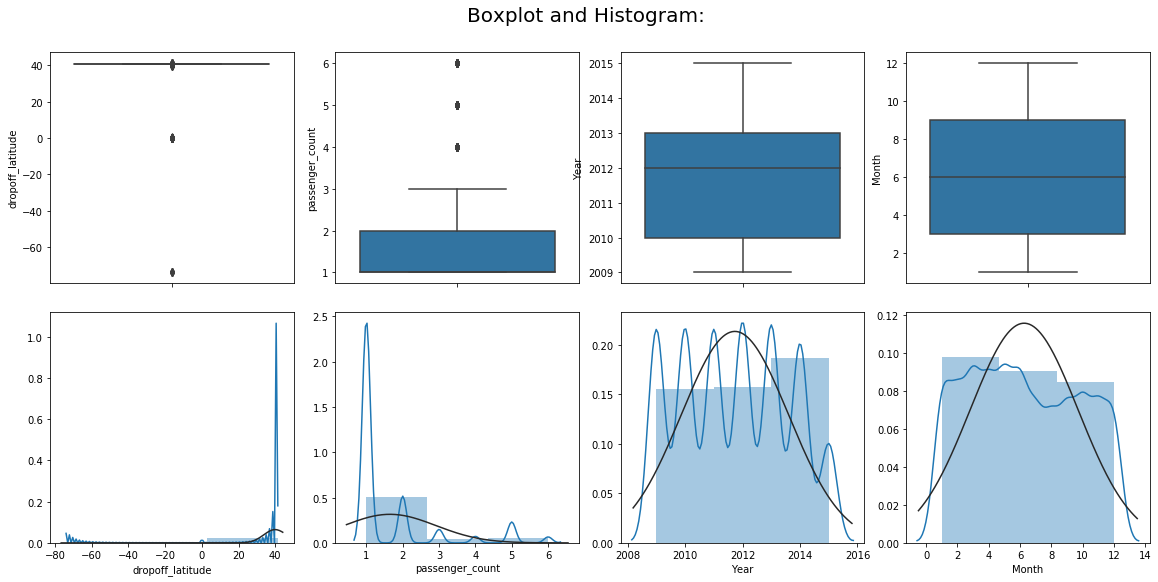

In [49]:
# plotting boxplot and histogram for numerical variables in train dataset
histogram_and_box_plots('dropoff_latitude','passenger_count', 'Year','Month',  dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

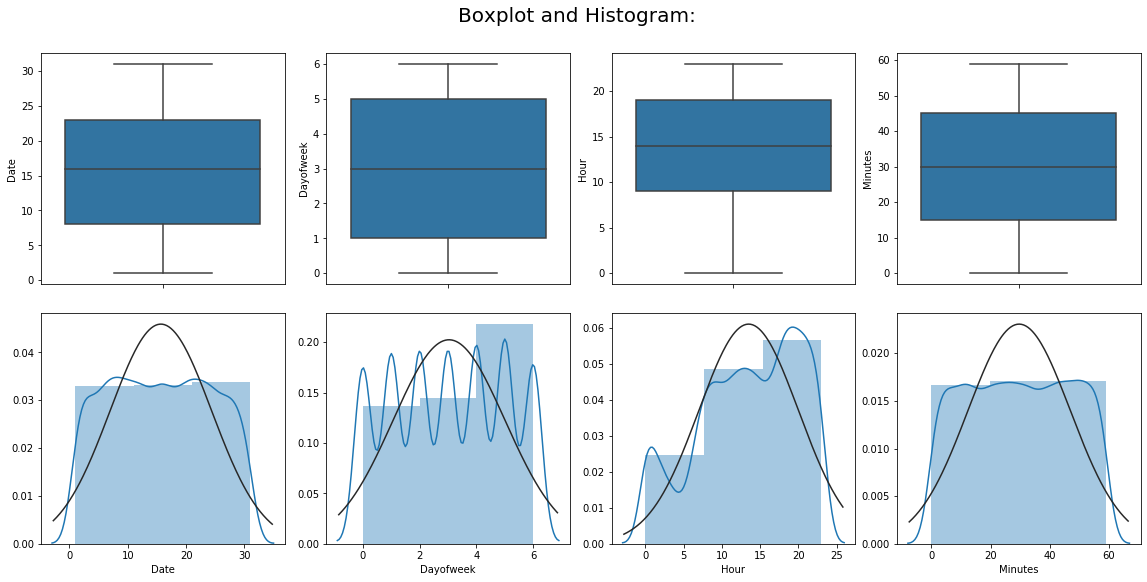

In [50]:
# plotting boxplot and histogram for numerical variables in train dataset
histogram_and_box_plots('Date', 'Dayofweek', 'Hour', 'Minutes', dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

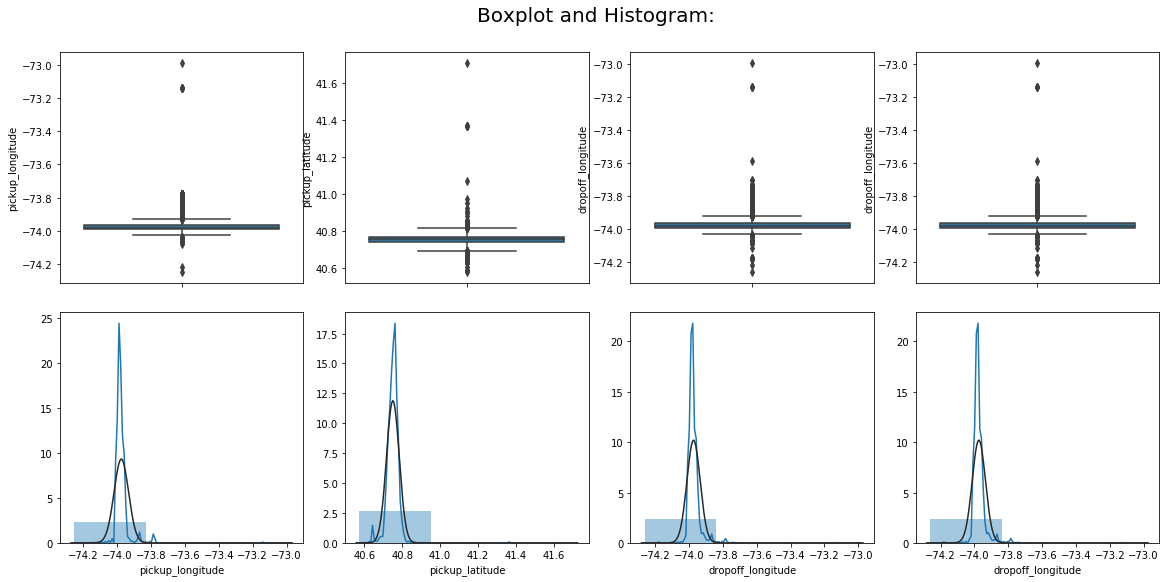

In [51]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_longitude',dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" ")

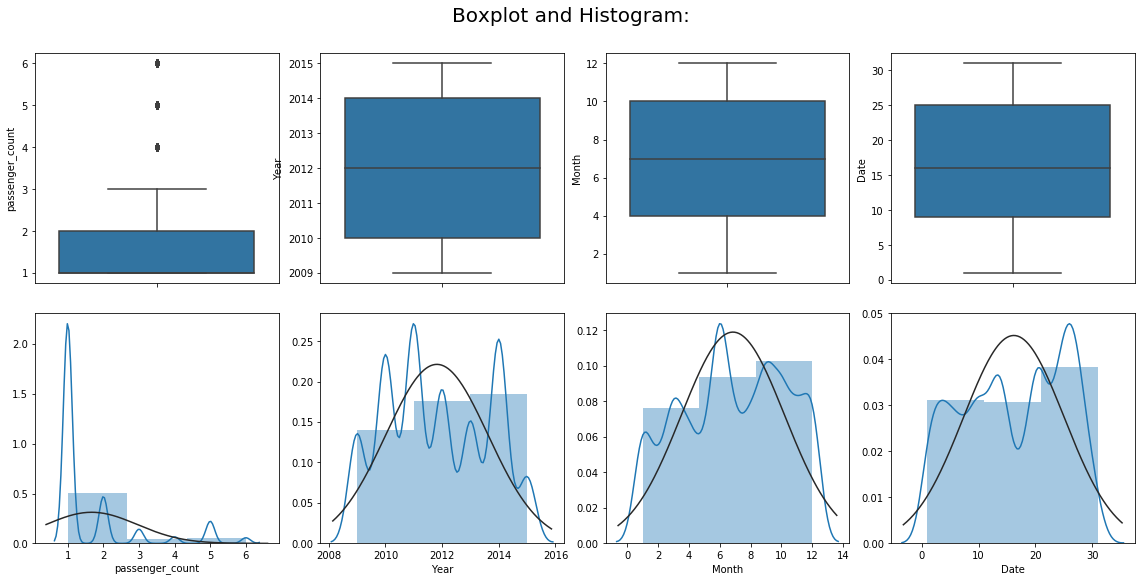

In [52]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('passenger_count', 'Year','Month','Date',  dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

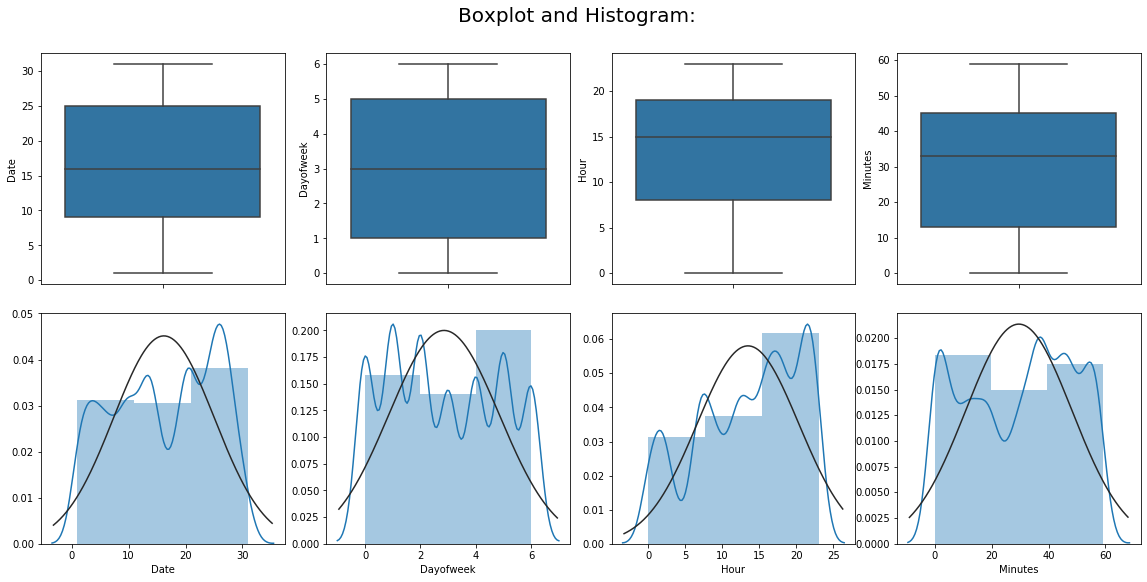

In [53]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('Date','Dayofweek','Hour','Minutes', dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

In [54]:
#Longitude range----(-180 to 180)
#Latitude range----(-90 to 90)
# Check observations having pickup longitute and pickup latitute out the range in train dataset.

train_cab[train_cab['pickup_longitude']<-180]
train_cab[train_cab['pickup_longitude']> 180]
train_cab[train_cab['pickup_latitude']<-90]
train_cab[train_cab['pickup_latitude']> 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
5685,3.3,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0,0.0


In [55]:
# Check observations having dropoff longitute and dropoff latitute out the range in train dataset.

train_cab[train_cab['dropoff_longitude']<-180]
train_cab[train_cab['dropoff_longitude']> 180]
train_cab[train_cab['dropoff_latitude']<-90]
train_cab[train_cab['dropoff_latitude']> 90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds


In [56]:
# Dropping the observations which are outof range in train dataset:

train_cab = train_cab.drop((train_cab[train_cab['pickup_longitude']<-180]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['pickup_longitude']> 180]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']<-90]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']> 90]).index, axis=0)

train_cab = train_cab.drop((train_cab[train_cab['dropoff_longitude']<-180]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['dropoff_longitude']> 180]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['dropoff_latitude']<-90]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['dropoff_latitude']> 90]).index, axis=0)

In [57]:
#Longitude range----(-180 to 180)
#Latitude range----(-90 to 90)
# Check observations having pickup longitute and pickup latitute out the range in test dataset.

test_cab[test_cab['pickup_longitude']<-180]
test_cab[test_cab['pickup_longitude']> 180]
test_cab[test_cab['pickup_latitude']<-90]
test_cab[test_cab['pickup_latitude']> 90]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds


In [58]:
# Check observations having dropoff longitute and dropoff latitute out the range in train dataset.

test_cab[test_cab['dropoff_longitude']<-180]
test_cab[test_cab['dropoff_longitude']> 180]
test_cab[test_cab['dropoff_latitude']<-90]
test_cab[test_cab['dropoff_latitude']> 90]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds


In [59]:
# Dropping the observations which are outof range in test dataset:

test_cab = test_cab.drop((test_cab[test_cab['pickup_longitude']<-180]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['pickup_longitude']> 180]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['pickup_latitude']<-90]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['pickup_latitude']> 90]).index, axis=0)

test_cab = test_cab.drop((test_cab[test_cab['dropoff_longitude']<-180]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['dropoff_longitude']> 180]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['dropoff_latitude']<-90]).index, axis=0)
test_cab = test_cab.drop((test_cab[test_cab['dropoff_latitude']> 90]).index, axis=0)

In [60]:
# Get all column names
train_cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes', 'Seconds'],
      dtype='object')

In [61]:
cnamestrain = ['fare_amount','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 
          'Year','Month','Date', 'Dayofweek', 'Hour', 'Minutes','Seconds']
cnamestest = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 
          'Year','Month','Date', 'Dayofweek', 'Hour', 'Minutes','Seconds']
# excluded 'passenger_count' reason that upper limit need to set at 6 because maximum allowable count are 6 passenger.

In [62]:
for i in cnamestrain:   
# Quartiles and IQR

    q25,q75 = np.percentile(train_cab[i],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    train_cab.loc[train_cab[i] < LL,i] = LL 
    train_cab.loc[train_cab[i] > UL,i] = UL

In [63]:
# For Passenger_count variable
# Quartiles and IQR

    q25,q75 = np.percentile(train_cab['passenger_count'],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    train_cab.loc[train_cab['passenger_count'] < LL,'passenger_count'] = LL 
    train_cab.loc[train_cab['passenger_count'] > 6,'passenger_count'] = UL

In [64]:
###for test data set
for i in cnamestest:   
# Quartiles and IQR

    q25,q75 = np.percentile(test_cab[i],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    test_cab.loc[test_cab[i] < LL,i] = LL 
    test_cab.loc[test_cab[i] > UL,i] = UL

In [65]:
# For Passenger_count variable
# Quartiles and IQR

    q25,q75 = np.percentile(test_cab['passenger_count'],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    test_cab.loc[test_cab['passenger_count'] < LL,'passenger_count'] = LL 
    test_cab.loc[test_cab['passenger_count'] > 6,'passenger_count'] = UL

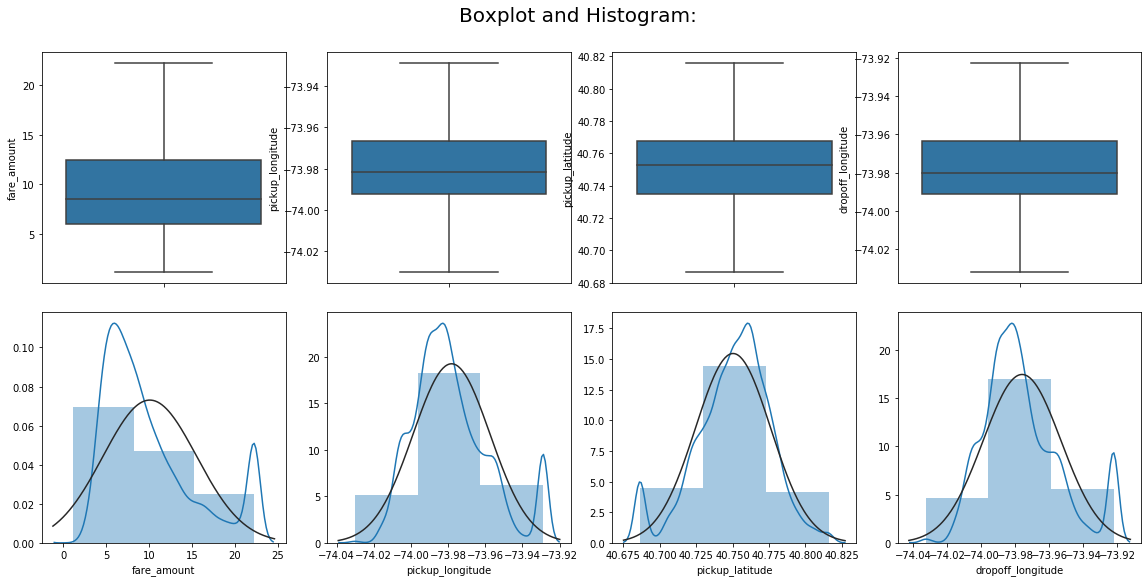

In [66]:
# Lets visualize boxplots again after removal of outliers in train dataset:

# plotting boxplot and histogram for our numerical variables
histogram_and_box_plots('fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude',dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" " )

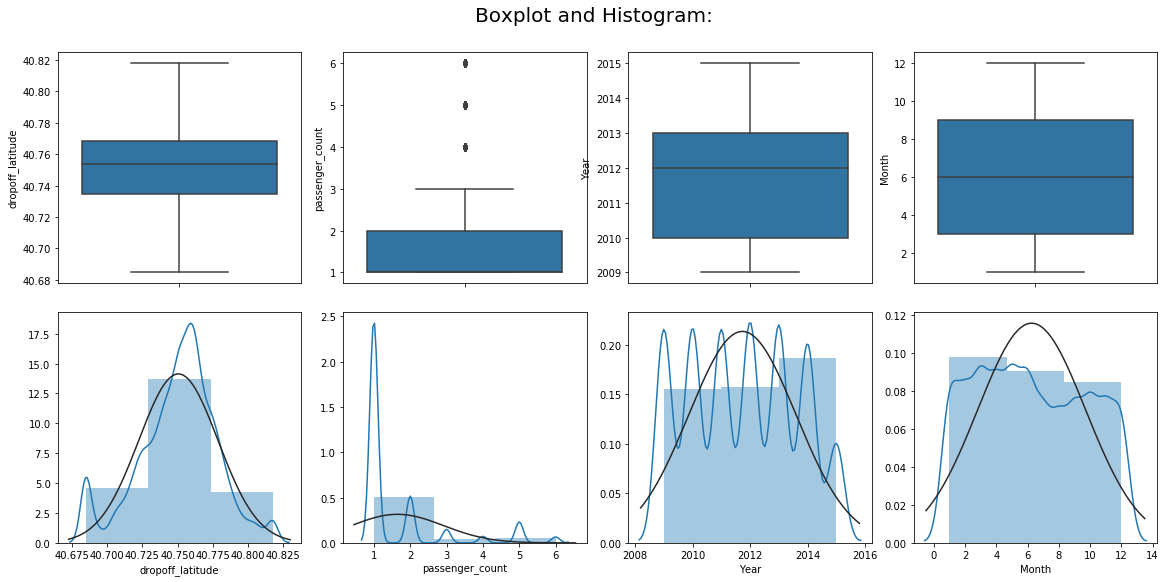

In [67]:
# plotting boxplot and histogram for numerical variables in train dataset:
histogram_and_box_plots('dropoff_latitude','passenger_count', 'Year','Month',  dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

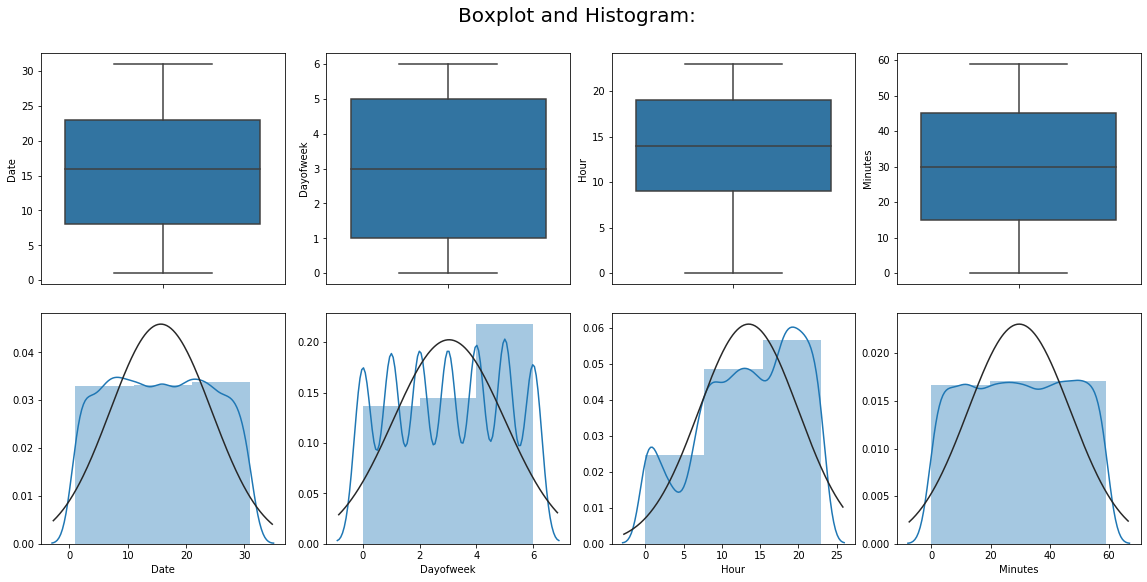

In [68]:
# plotting boxplot and histogram for numerical variables in train dataset
histogram_and_box_plots('Date', 'Dayofweek', 'Hour', 'Minutes', dataframe = train_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3, sup=" ")

In [69]:
#Lets visualize boxplots again after removal of outliers in Test dataset
test_cab.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date',
       'Dayofweek', 'Hour', 'Minutes', 'Seconds'],
      dtype='object')

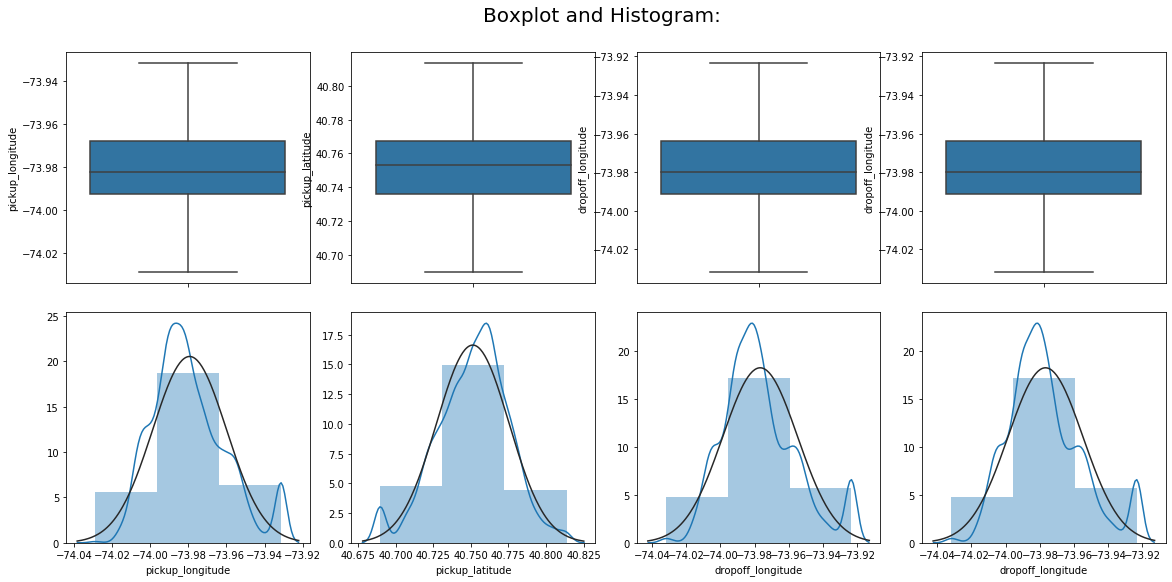

In [70]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_longitude',dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" ")

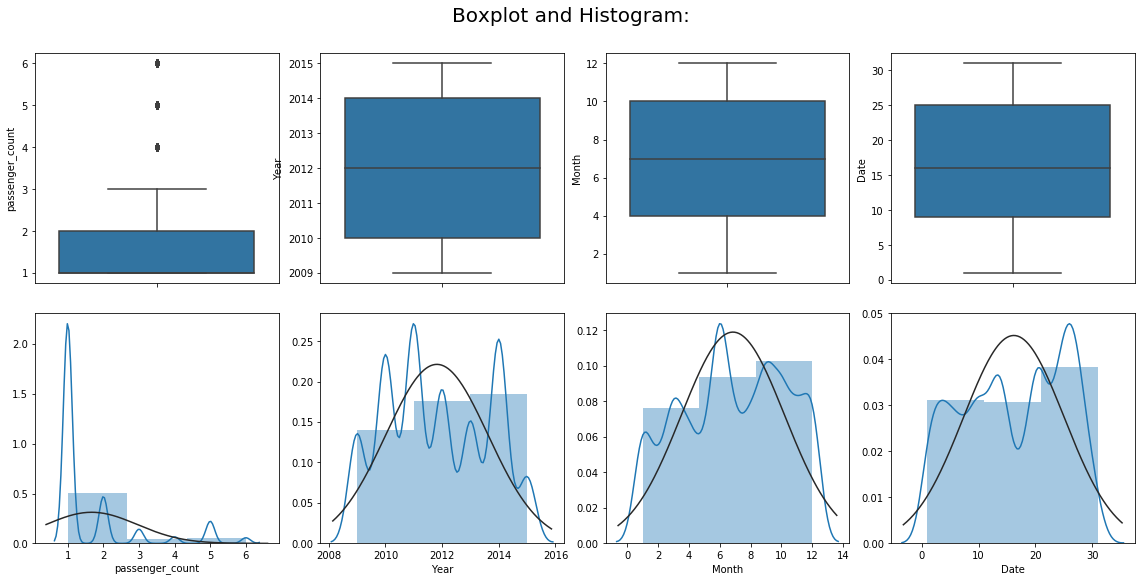

In [71]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('passenger_count', 'Year', 'Month', 'Date',dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" ")

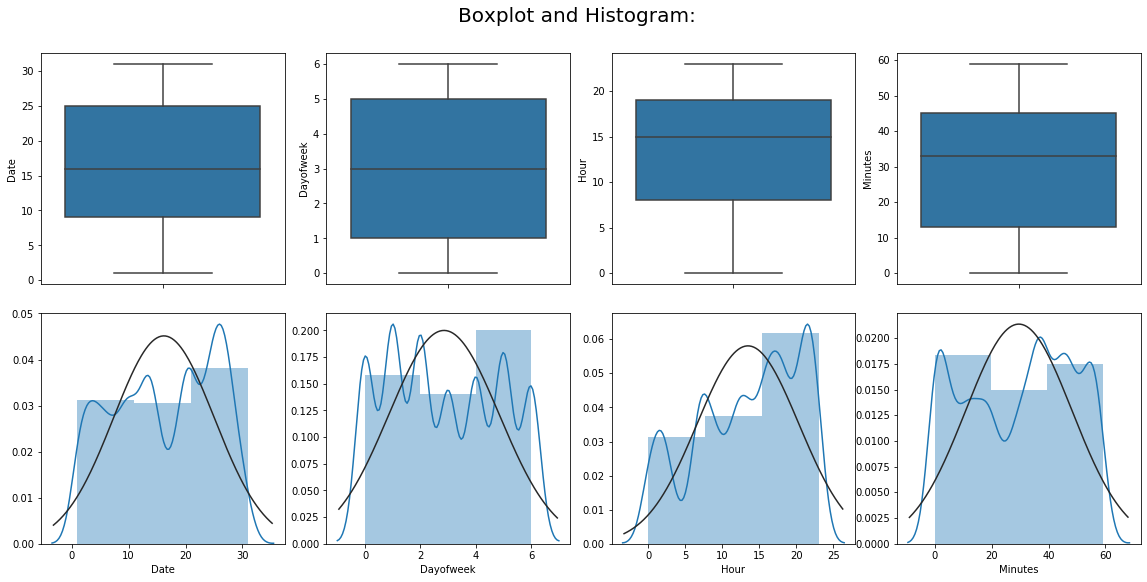

In [72]:
# plotting boxplot and histogram for numerical variables in test dataset
histogram_and_box_plots('Date','Dayofweek', 'Hour', 'Minutes',dataframe = test_cab, bin1 = 3,bin2 = 3,bin3 = 3,bin4 = 3,sup=" ")

In [73]:
train_cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
0,4.5,-73.928856,40.721319,-73.922335,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,21.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,42.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,0.0


In [74]:
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds
0,-73.973320,40.763805,-73.981430,40.743835,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,24.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,24.0
2,-73.982524,40.751260,-73.979654,40.746139,1.0,2011.0,10.0,8.0,5.0,11.0,53.0,44.0
3,-73.981160,40.767807,-73.990448,40.751635,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,12.0
4,-73.966046,40.789775,-73.988565,40.744427,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,12.0


In [75]:
train_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,15982.0,10.073678,5.459984,1.140000,6.000000,8.500000,12.500000,22.250000
pickup_longitude,15982.0,-73.978120,0.020732,-74.030137,-73.992157,-73.981697,-73.966837,-73.928856
pickup_latitude,15982.0,40.750320,0.025827,40.686263,40.734946,40.752636,40.767401,40.816084
dropoff_longitude,15982.0,-73.975959,0.022853,-74.032490,-73.991182,-73.980166,-73.963643,-73.922335
dropoff_latitude,15982.0,40.750596,0.028222,40.684745,40.734715,40.753583,40.768028,40.817997
passenger_count,15982.0,1.649293,1.264606,1.000000,1.000000,1.000000,2.000000,6.000000
Year,15982.0,2011.732574,1.867004,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
Month,15982.0,6.262233,3.447461,1.000000,3.000000,6.000000,9.000000,12.000000
Date,15982.0,15.668002,8.684849,1.000000,8.000000,16.000000,23.000000,31.000000
Dayofweek,15982.0,3.032975,1.968967,0.000000,1.000000,3.000000,5.000000,6.000000


In [76]:
test_cab.describe().T

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,9914.0,-73.979397,0.019442,-74.029232,-73.992501,-73.982326,-73.968013,-73.931282
pickup_latitude,9914.0,40.751315,0.024010,40.689644,40.736125,40.753051,40.767113,40.813594
dropoff_longitude,9914.0,-73.976704,0.021905,-74.032028,-73.991247,-73.980015,-73.964059,-73.923278
dropoff_latitude,9914.0,40.751805,0.027554,40.685000,40.735254,40.754065,40.768757,40.819011
passenger_count,9914.0,1.671273,1.278747,1.000000,1.000000,1.000000,2.000000,6.000000
Year,9914.0,2011.815816,1.803347,2009.000000,2010.000000,2012.000000,2014.000000,2015.000000
Month,9914.0,6.857979,3.353272,1.000000,4.000000,7.000000,10.000000,12.000000
Date,9914.0,16.194170,8.838482,1.000000,9.000000,16.000000,25.000000,31.000000
Dayofweek,9914.0,2.852834,1.994451,0.000000,1.000000,3.000000,5.000000,6.000000
Hour,9914.0,13.467420,6.868584,0.000000,8.000000,15.000000,19.000000,23.000000


In [77]:
#Calculating distance based on the given coordinates :
#from math import radians, cos, sin, asin, sqrt

def distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    
    #Convert degrees to radians
    pickup_lat, pickup_lon, dropoff_lat, dropoff_lon = map(np.radians,
                                                             [pickup_lat, pickup_lon, 
                                                              dropoff_lat, dropoff_lon])
    #Compute distances along lat, lon dimensions
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    
    #Compute haversine distance
    a = np.sin(dlat/2.0)**2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

In [78]:
train_cab['distance'] = distance(train_cab['pickup_latitude'], 
                                 train_cab['pickup_longitude'],
                                 train_cab['dropoff_latitude'] ,
                                 train_cab['dropoff_longitude'])

In [79]:
test_cab['distance'] = distance(test_cab['pickup_latitude'], 
                                 test_cab['pickup_longitude'],
                                 test_cab['dropoff_latitude'] ,
                                 test_cab['dropoff_longitude'])

In [80]:
train_cab.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds,distance
0,4.5,-73.928856,40.721319,-73.922335,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,21.0,1.145751
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,16.0,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,0.0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,42.0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,0.0,1.999157


In [81]:
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Dayofweek,Hour,Minutes,Seconds,distance
0,-73.973320,40.763805,-73.981430,40.743835,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,24.0,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1.0,2015.0,1.0,27.0,1.0,13.0,8.0,24.0,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1.0,2011.0,10.0,8.0,5.0,11.0,53.0,44.0,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,12.0,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1.0,2012.0,12.0,1.0,5.0,21.0,12.0,12.0,5.387301


In [82]:
train_cab.shape

(15982, 14)

In [83]:
test_cab.shape

(9914, 13)

outliers check in distance variable of train dataset


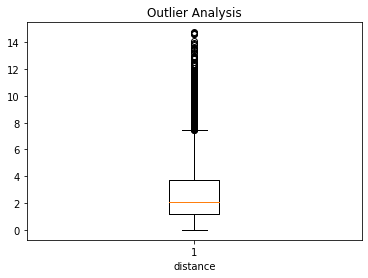

In [84]:
# Check is there any outliers in this distance variable:
print("outliers check in distance variable of train dataset")
plt.boxplot(train_cab['distance'])

plt.xlabel('distance')

plt.title('Outlier Analysis')

plt.show()

outliers check in distance variable of test dataset


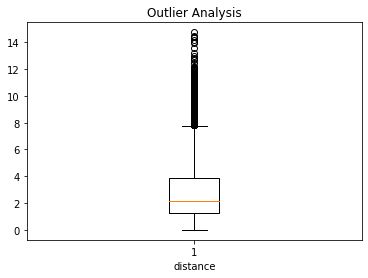

In [85]:
# Lets check is there any outliers in this distance variable in test dataset
print("outliers check in distance variable of test dataset")
plt.boxplot(test_cab['distance'])

plt.xlabel('distance')

plt.title('Outlier Analysis')

plt.show()

In [86]:
#Check whether train data set have any values less than 1.
#train_cab[(train_cab['distance'] < 1) & (train_cab['fare_amount'] > 10)].count()
train_cab[(train_cab['distance'] < 1)].count()

fare_amount          2992
pickup_longitude     2992
pickup_latitude      2992
dropoff_longitude    2992
dropoff_latitude     2992
passenger_count      2992
Year                 2992
Month                2992
Date                 2992
Dayofweek            2992
Hour                 2992
Minutes              2992
Seconds              2992
distance             2992
dtype: int64

In [87]:
#Check whether test data set have any values less than 1.
#check whether test data set have any values less than 1.
test_cab[(test_cab['distance'] < 1)].count()

pickup_longitude     1553
pickup_latitude      1553
dropoff_longitude    1553
dropoff_latitude     1553
passenger_count      1553
Year                 1553
Month                1553
Date                 1553
Dayofweek            1553
Hour                 1553
Minutes              1553
Seconds              1553
distance             1553
dtype: int64

In [88]:
# We have some values less than 1 so instaed of deleting such observations impute with mean values
train_cab.loc[train_cab.distance < 1,'distance'] = train_cab['distance'].mean()

In [89]:
# We have some values less than 1 so instaed of deleting such observations impute with mean values
test_cab.loc[test_cab.distance < 1,'distance'] = test_cab['distance'].mean()

In [90]:
# Quartiles and IQR

    q25,q75 = np.percentile(train_cab['distance'],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    train_cab.loc[train_cab['distance'] < LL ,'distance'] = LL  
    train_cab.loc[train_cab['distance'] > UL ,'distance'] = UL

In [91]:
# Quartiles and IQR

    q25,q75 = np.percentile(test_cab['distance'],[25,75])

    IQR = q75-q25

# Lower and upper limits 

    LL = q25 - (1.5 * IQR)

    UL = q75 + (1.5 * IQR)

# Capping with ul for maxmimum values 

    test_cab.loc[test_cab['distance'] < LL ,'distance'] = LL  
    test_cab.loc[test_cab['distance'] > UL ,'distance'] = UL

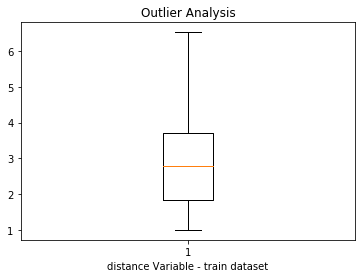

In [92]:
# Let's visualise distance variable boxplot after removal of outliers from train dataset.

plt.boxplot(train_cab['distance'])

plt.xlabel('distance Variable - train dataset')

plt.title('Outlier Analysis')

plt.show()

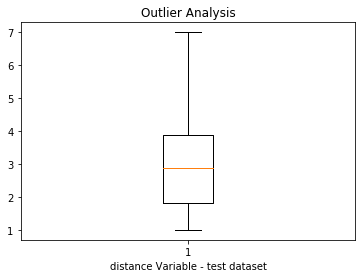

In [93]:
# Let's visualise distance variable boxplot after removal of outliers from test dataset.

plt.boxplot(test_cab['distance'])

plt.xlabel('distance Variable - test dataset')

plt.title('Outlier Analysis')

plt.show()

In [94]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15982 entries, 0 to 16065
Data columns (total 14 columns):
fare_amount          15982 non-null float64
pickup_longitude     15982 non-null float64
pickup_latitude      15982 non-null float64
dropoff_longitude    15982 non-null float64
dropoff_latitude     15982 non-null float64
passenger_count      15982 non-null float64
Year                 15982 non-null float64
Month                15982 non-null float64
Date                 15982 non-null float64
Dayofweek            15982 non-null float64
Hour                 15982 non-null float64
Minutes              15982 non-null float64
Seconds              15982 non-null float64
distance             15982 non-null float64
dtypes: float64(14)
memory usage: 1.8 MB


In [95]:
test_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9914 entries, 0 to 9913
Data columns (total 13 columns):
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null float64
Year                 9914 non-null float64
Month                9914 non-null float64
Date                 9914 non-null float64
Dayofweek            9914 non-null float64
Hour                 9914 non-null float64
Minutes              9914 non-null float64
Seconds              9914 non-null float64
distance             9914 non-null float64
dtypes: float64(13)
memory usage: 1.1 MB


In [96]:
#------------------MULTIVARIATE ANALYSIS------------------
#A rule of thumb for interpreting the variance inflation factor:

#VIF = 1 ( Not correlated ) ;

#1 < VIF < 5 ( Moderately correlated );

#VIF >=5 ( Highly correlated )

In [97]:
# Import VIF function from statmodels Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term:

X = train_cab[['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude', 'passenger_count', 'Year',
               'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes', 'Seconds','distance']].dropna() #subset the dataframe
X ['Intercept'] = 1

# Compute and view VIF:

vif = pd.DataFrame()           # Create an empty dataframe
vif["Variables"] = X.columns   # Add "Variables" column to empty dataframe
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)


            Variables           VIF
0    pickup_longitude  1.380294e+00
1     pickup_latitude  1.558086e+00
2   dropoff_longitude  1.440550e+00
3    dropoff_latitude  1.547223e+00
4     passenger_count  1.047600e+00
5                Year  1.022645e+00
6               Month  1.017788e+00
7                Date  1.001458e+00
8           Dayofweek  1.015026e+00
9                Hour  1.014696e+00
10            Minutes  1.000914e+00
11            Seconds  1.056422e+00
12           distance  1.070550e+00
13          Intercept  2.591152e+07


In [98]:
#All the variables VIF < 2 . Hence no multicolinearity. In case of high VIF we will remove those observations from our dataset for further analysis

In [99]:
#------------------UNIVARIATE ANALYSIS------------------
#Univariate Analysis : Displays the statistic details or descriptive statistics of each variable
#Histogram for (Numeric) Continuous variables to check distribution of each variable

In [100]:
cnamestrain =['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
              'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes', 'Seconds','distance']

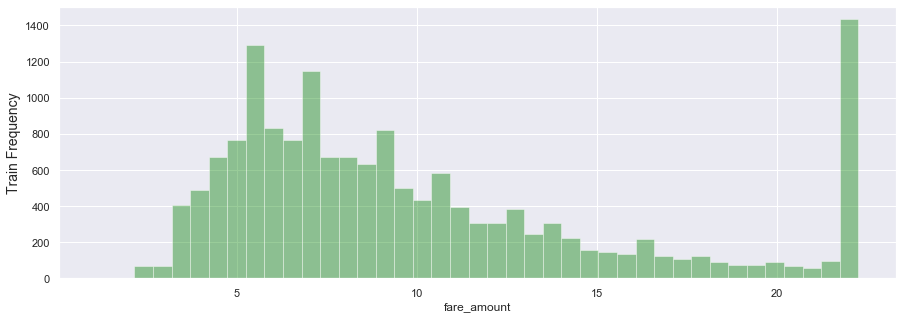

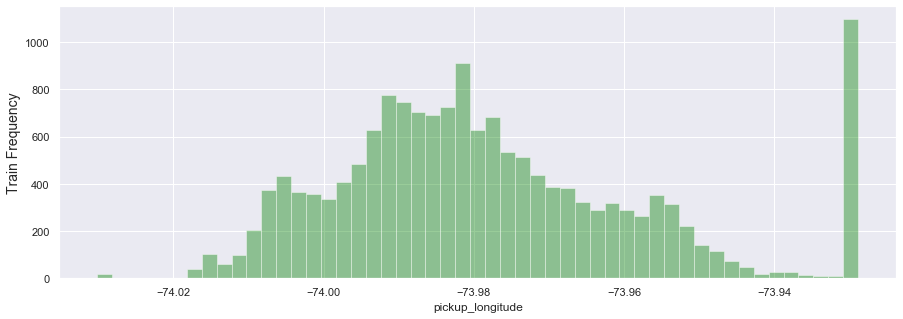

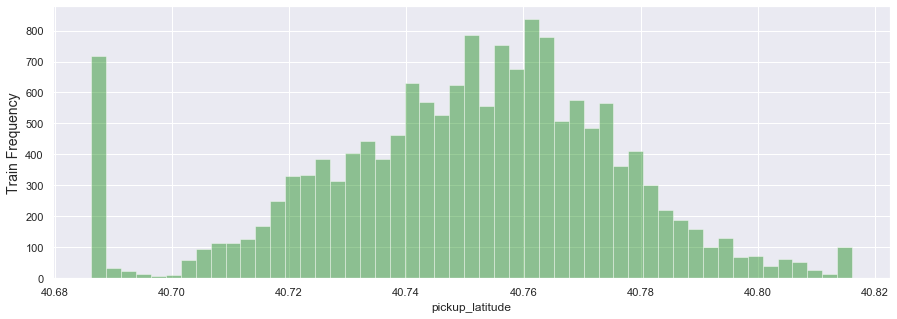

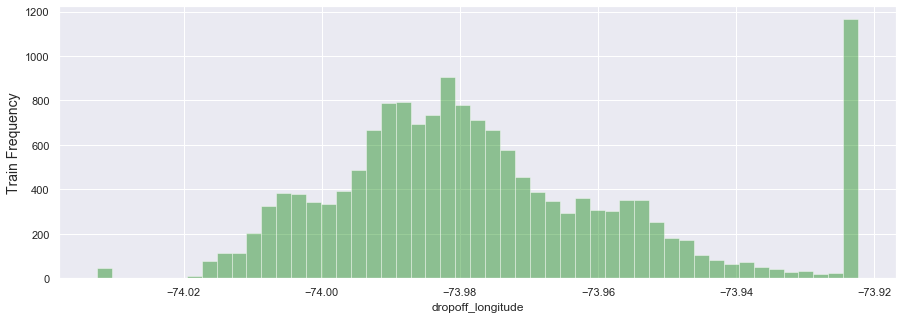

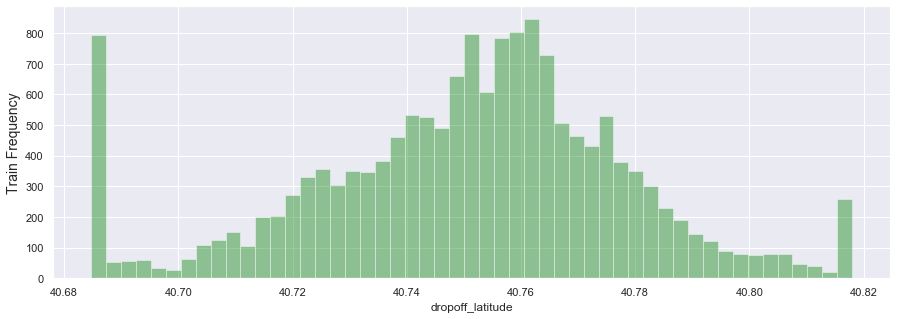

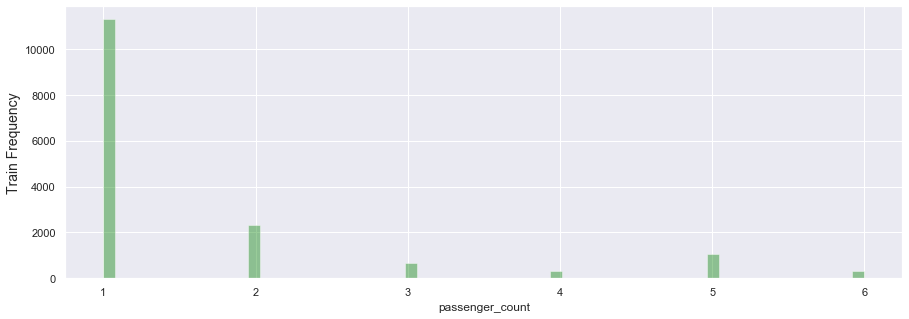

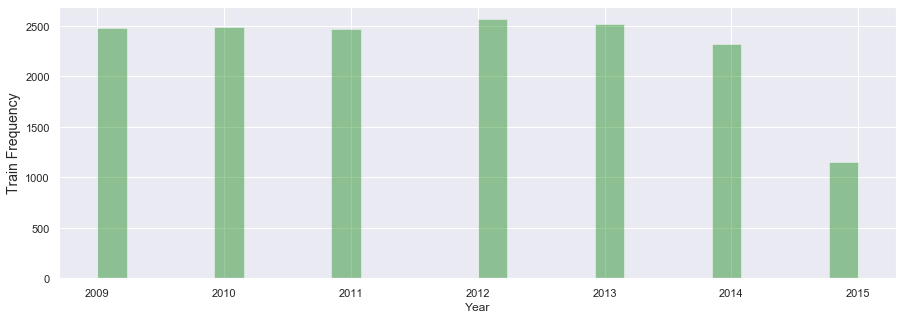

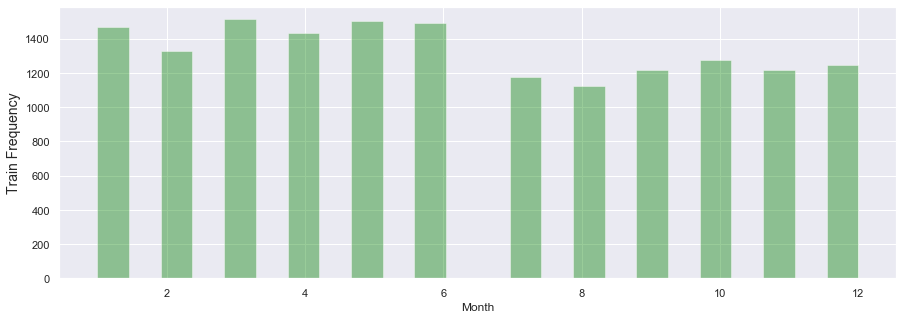

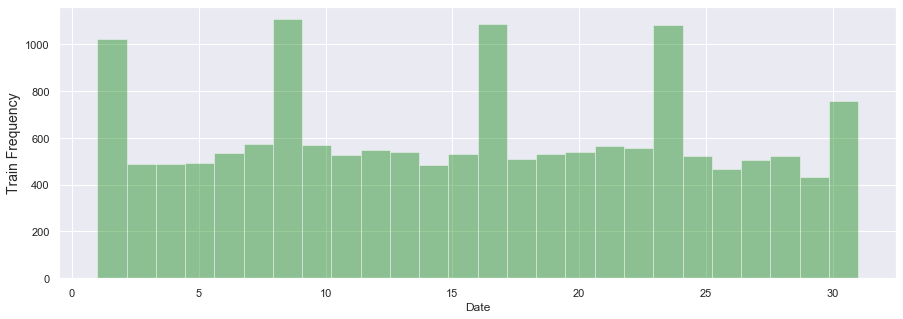

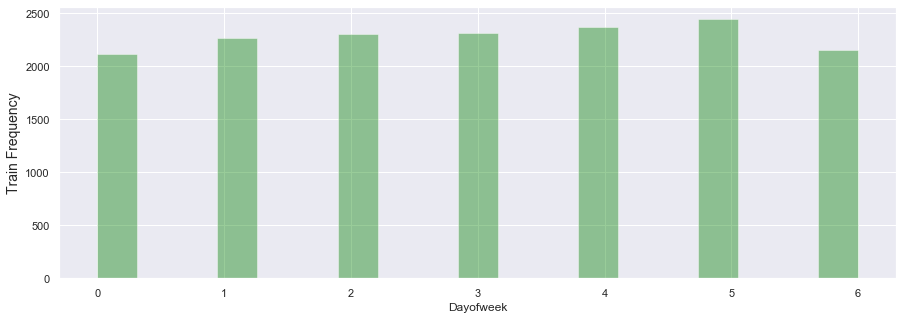

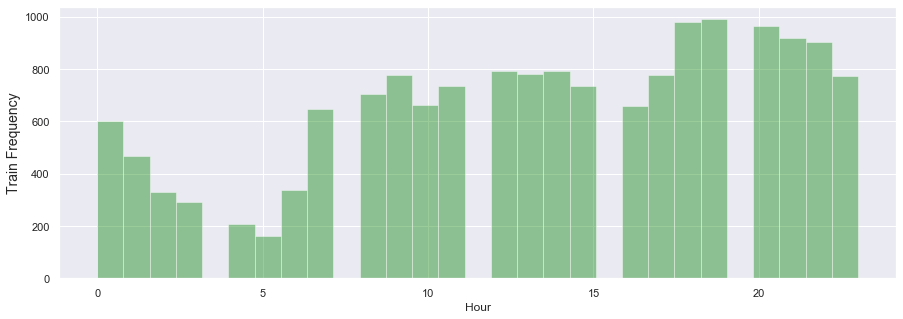

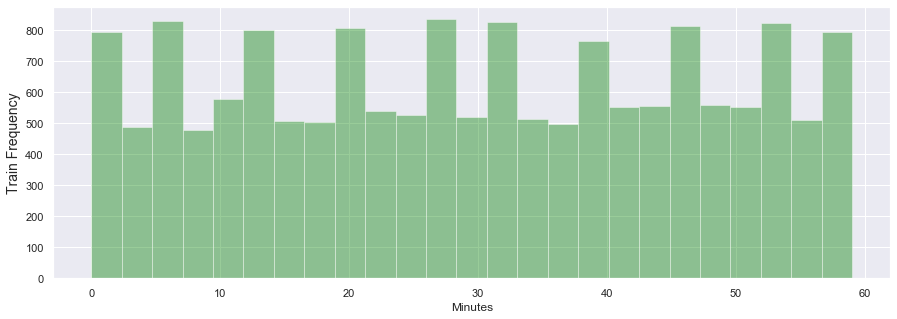

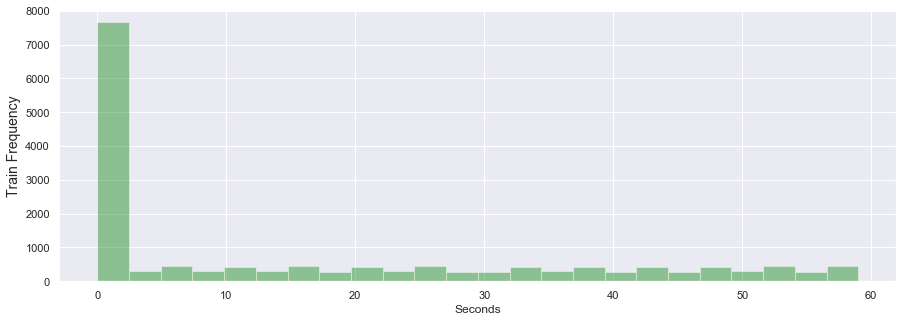

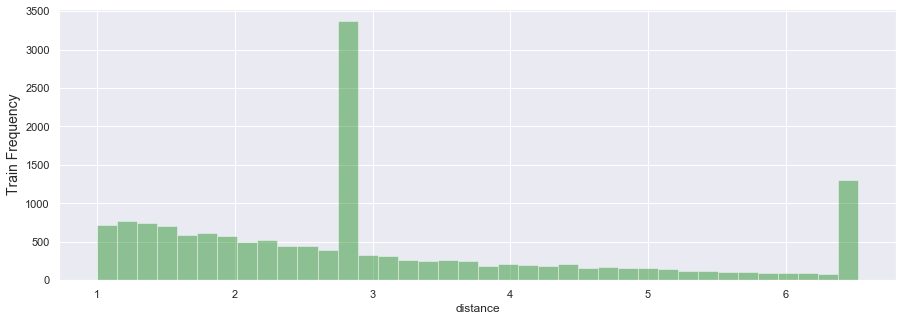

In [101]:
for i in cnamestrain:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(train_cab[i], kde=False,  color='green',bins ='auto')
    #plt.title(cnamestrain[i], fontsize=14)
   # plt.xlabel(cnamestrain[i], fontsize=14)
    plt.ylabel('Train Frequency', fontsize=14)
    plt.show()

In [102]:
#test_cab.columns
cnamestest = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
              'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes','Seconds', 'distance']

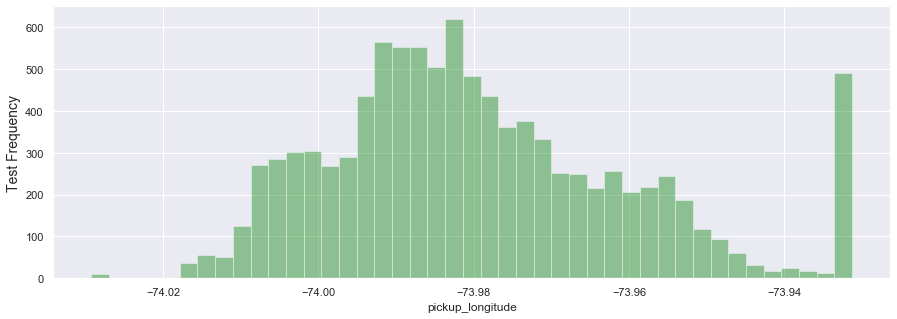

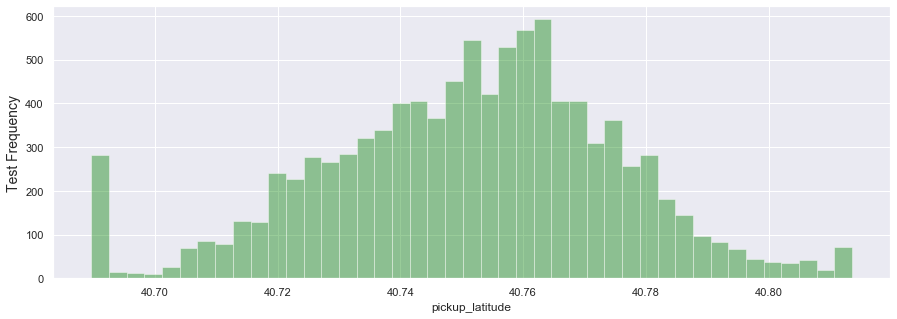

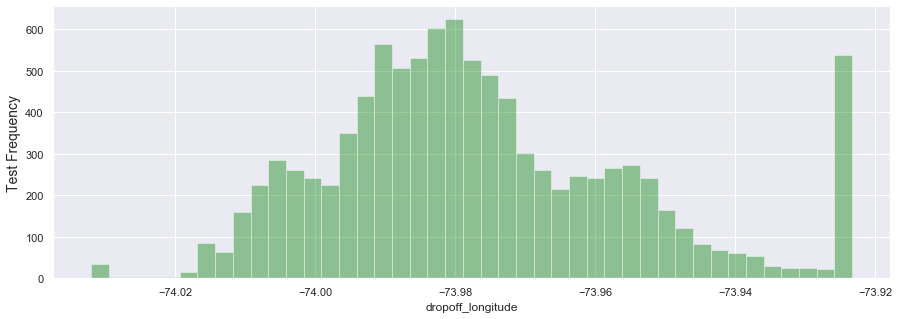

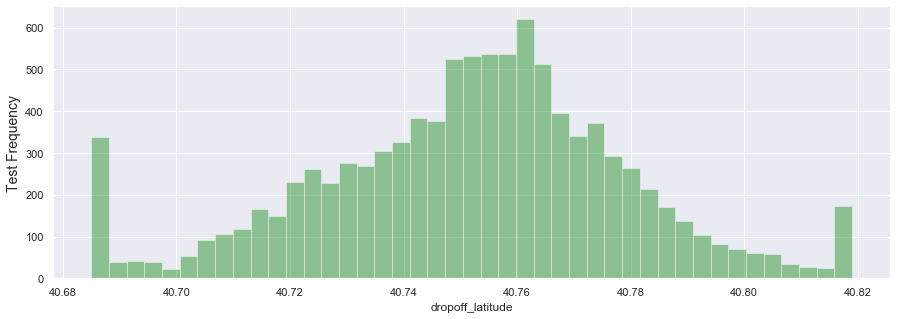

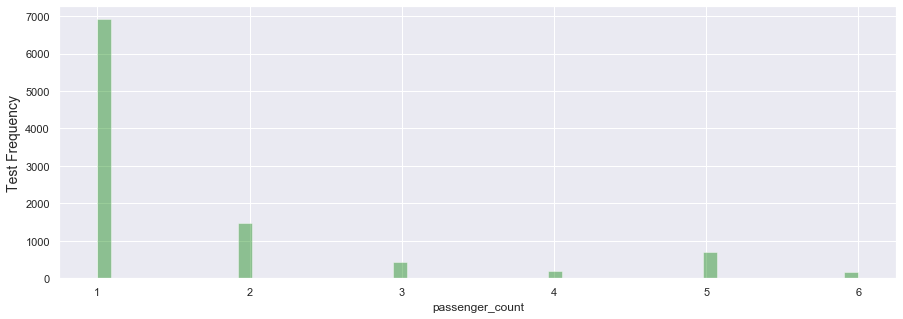

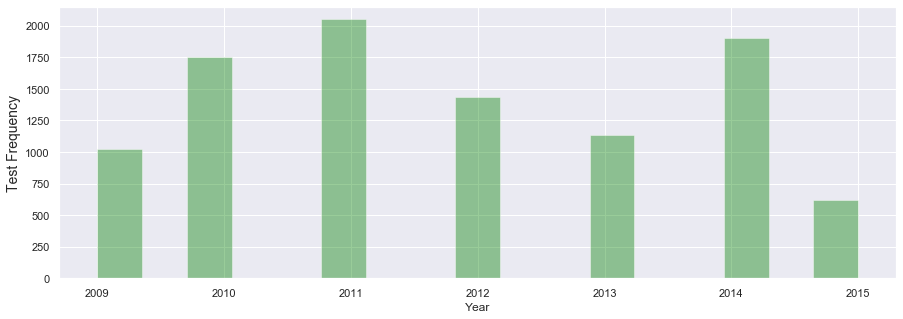

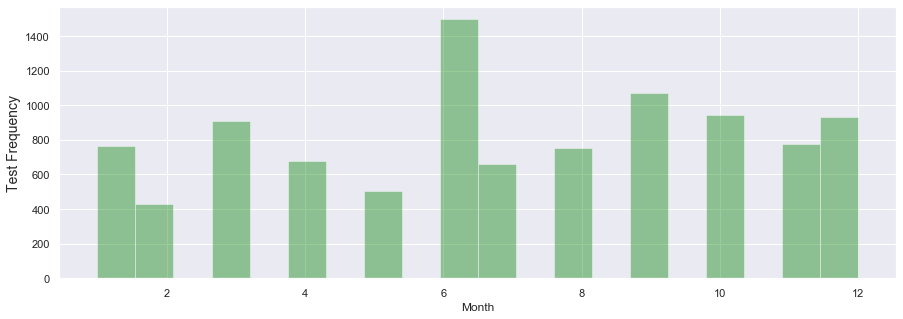

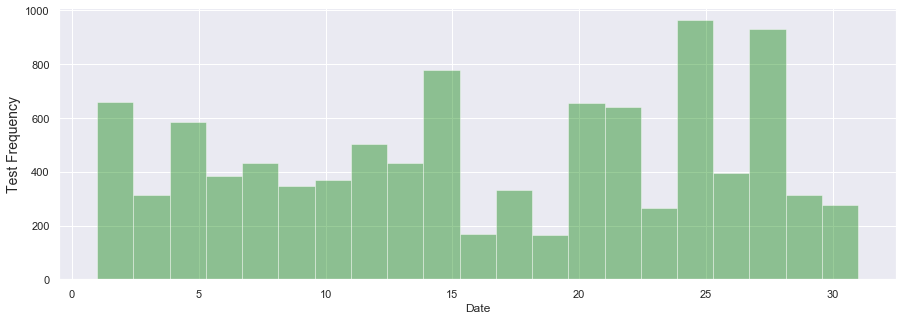

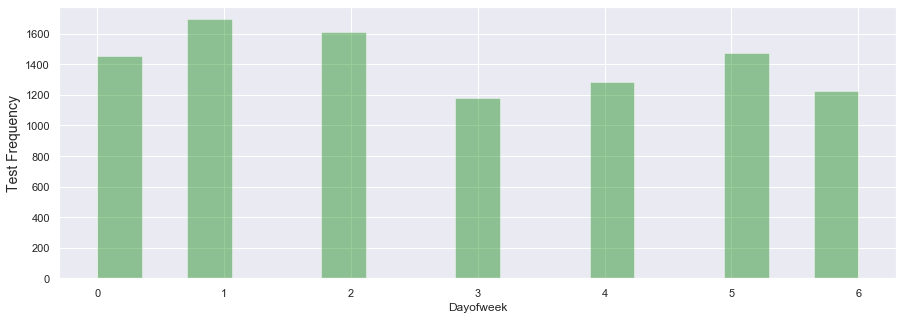

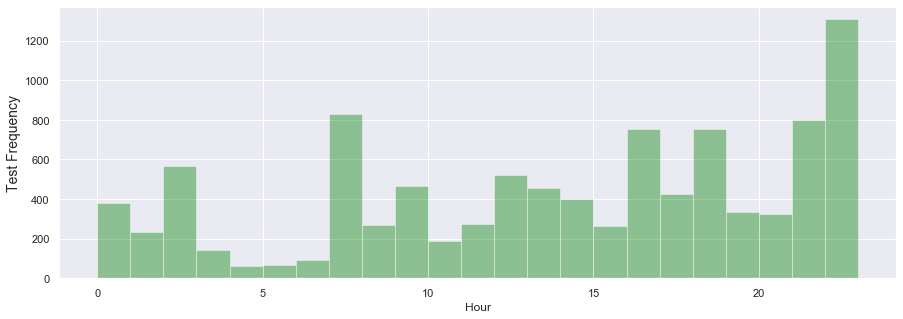

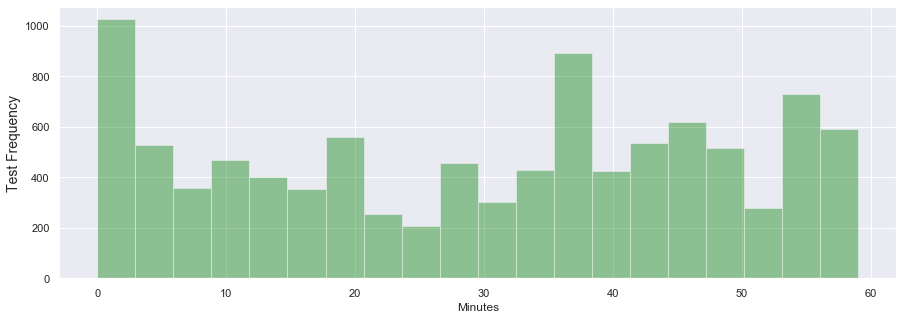

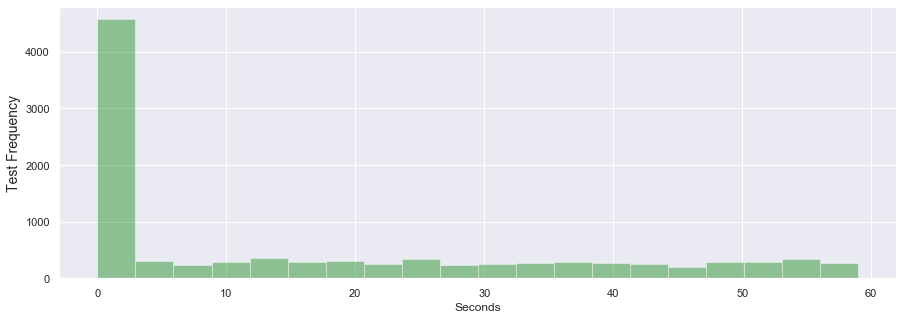

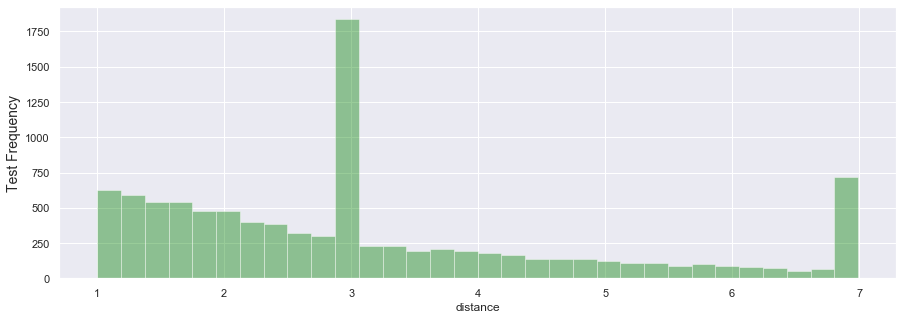

In [103]:
for i in cnamestest:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(test_cab[i], kde=False,  color='green',bins ='auto')
    #plt.title(cnamestrain[i], fontsize=14)
    #plt.xlabel(cnamestrain[i], fontsize=14)
    plt.ylabel('Test Frequency', fontsize=14)
    plt.show()

In [104]:
#------------------BI-VARIATE ANALYSIS-----------------
#Bi-variate Analysis using Barplots:

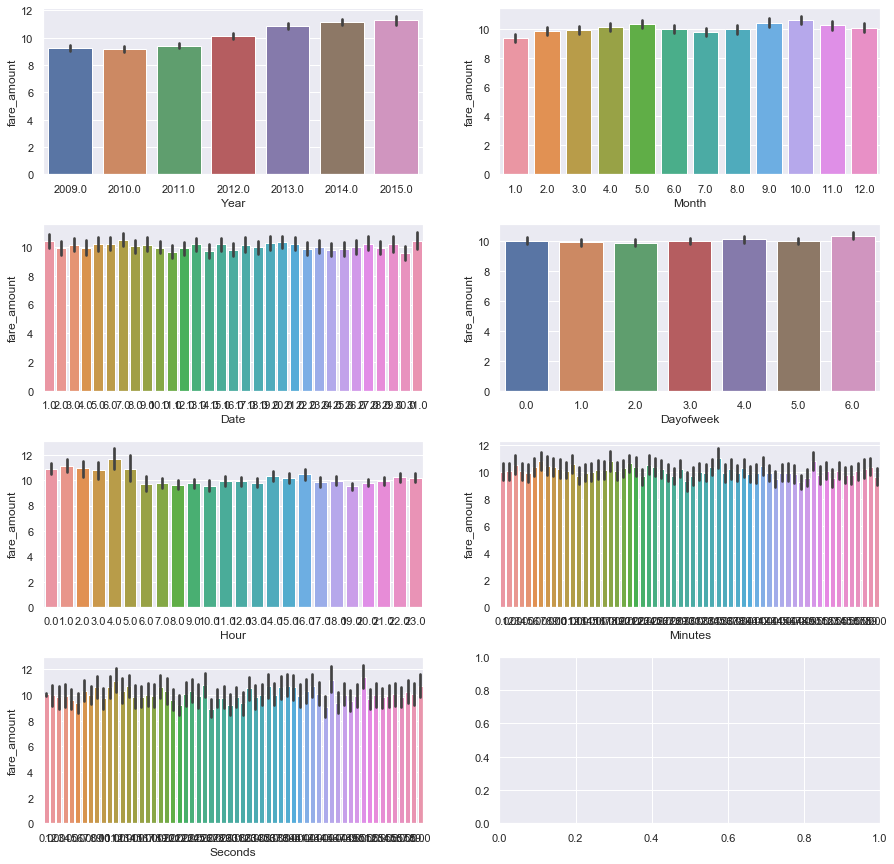

In [106]:
# For Catagorical Variables
fig, axarr = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)

sns.barplot(x='Year',     y='fare_amount',data=train_cab,ax=axarr[0][0])
sns.barplot(x='Month',    y='fare_amount',data=train_cab,ax=axarr[0][1])
sns.barplot(x='Date',     y='fare_amount',data=train_cab,ax=axarr[1][0])
sns.barplot(x='Dayofweek',y='fare_amount',data=train_cab,ax=axarr[1][1])
sns.barplot(x='Hour',     y='fare_amount',data=train_cab,ax=axarr[2][0])
sns.barplot(x='Minutes',  y='fare_amount',data=train_cab,ax=axarr[2][1])
sns.barplot(x='Seconds',  y='fare_amount',data=train_cab,ax=axarr[3][0])

In [107]:
 finaltrain=train_cab
 finaltest=test_cab
# finaltrain.to_csv("finaltrain.csv", index=False)
# finaltest.to_csv("finaltest.csv", index=False)

# # train_cab=finaltrain
# # test_cab=finaltest

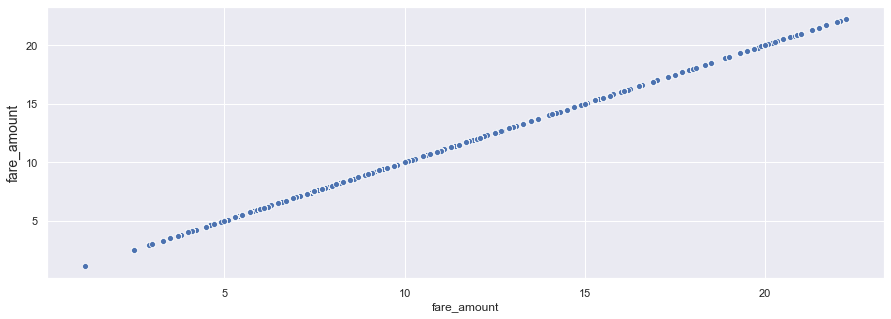

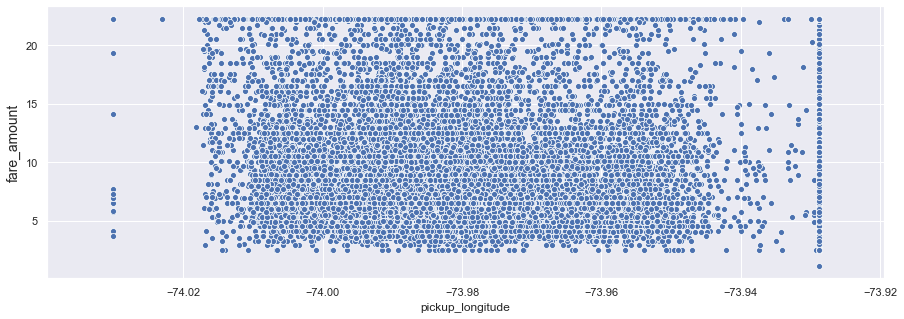

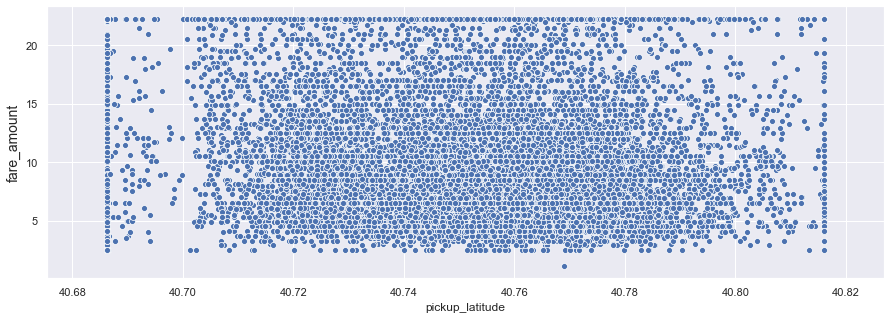

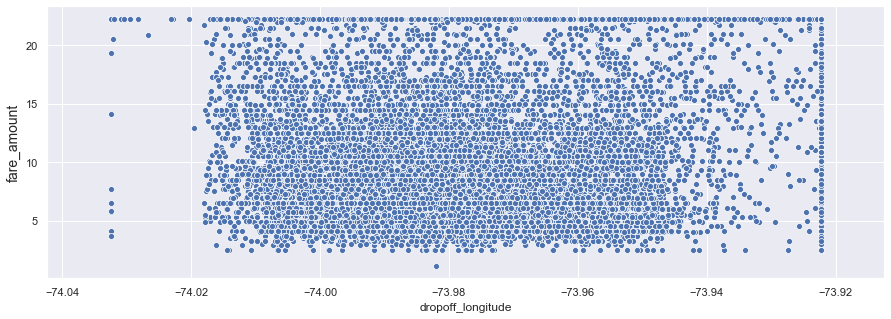

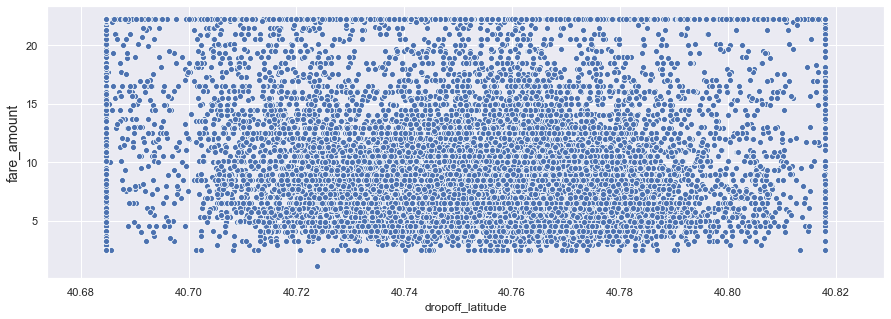

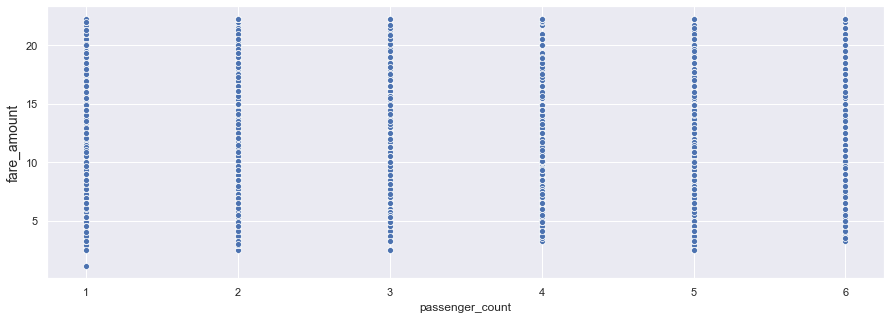

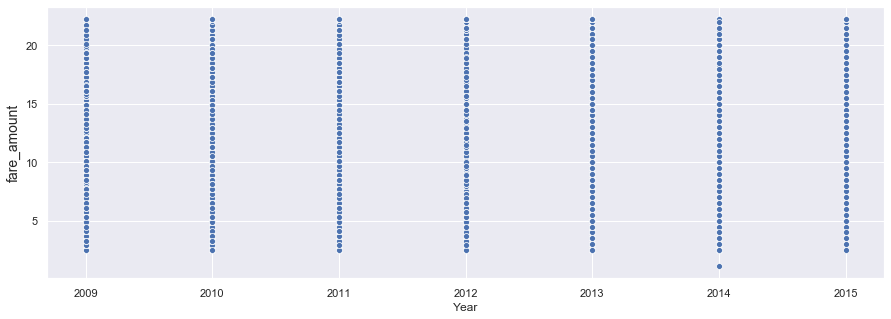

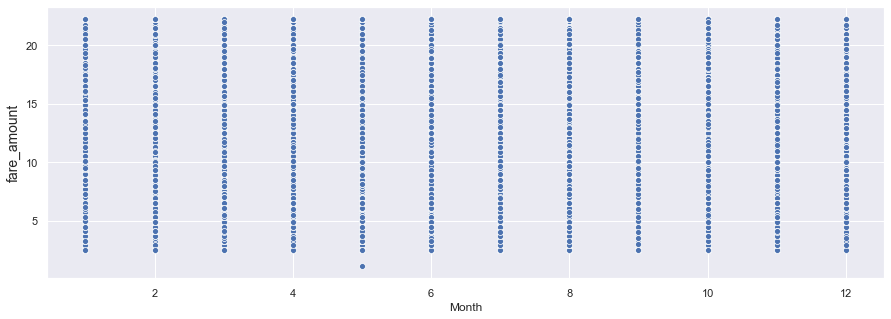

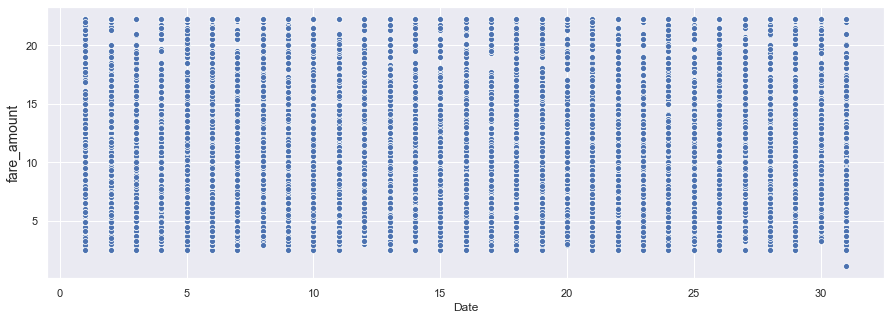

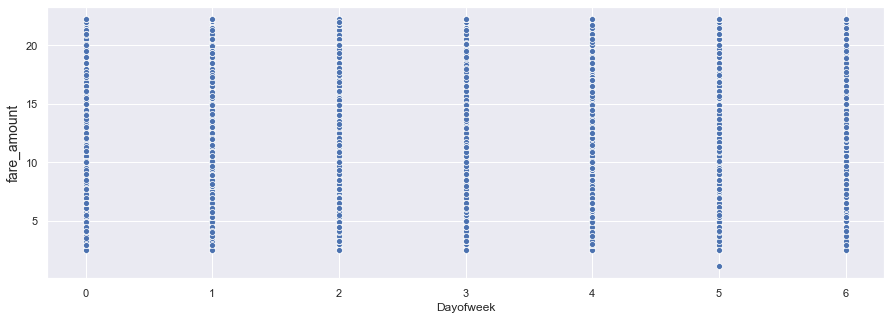

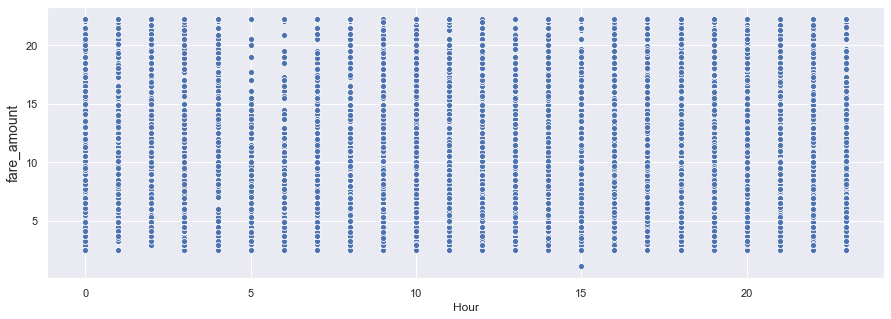

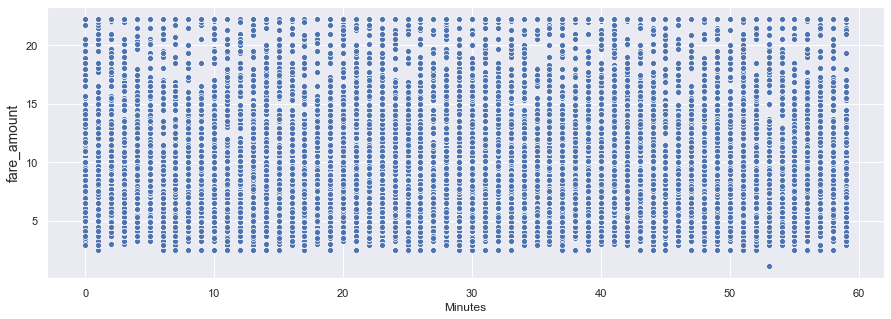

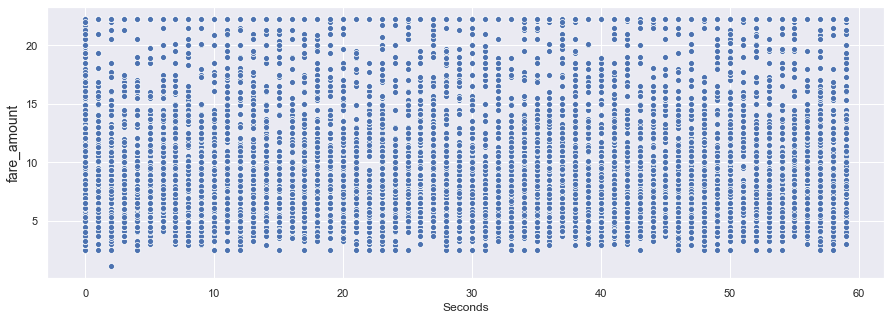

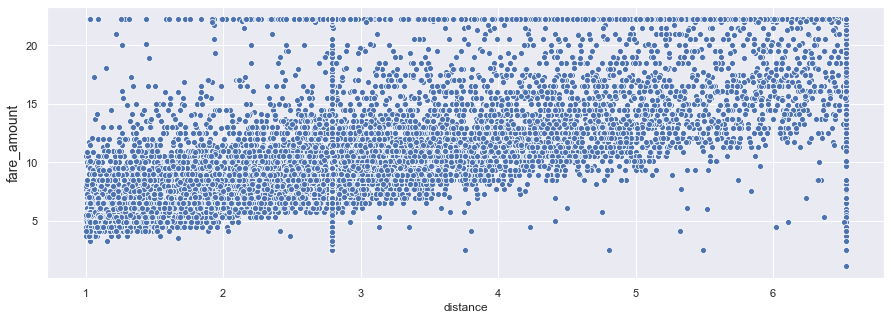

In [108]:
#Bi-variate Analysis using Scatter plots:
# Bi-variate Analysis: 
# Here one variables is independent while other one is dependent.So, here fare_amount is dependent variable and rest all variables are independent variables.
# let'scheck scatter plot for the variables with fare_amount how are they co-rrelated.

for i in cnamestrain:
    sns.set(rc={'figure.figsize':(15,5)})
    ax = sns.scatterplot(x=train_cab[i], y="fare_amount", data=train_cab)
    #plt.title(cnames1[i], fontsize=14)
    #plt.xlabel(cnames1[i], fontsize=14)
    plt.ylabel('fare_amount', fontsize=14)
    plt.show()

In [109]:
print("\n The missing value percentage in training data :")

#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_cab.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_values'})

#Calculate new variable missing value percentage
missing_val['Missing_Value_Percentage'] = (missing_val.Missing_values/len(train_cab))*100

#descending order
missing_val = missing_val.sort_values('Missing_Value_Percentage', ascending=False).reset_index(drop=True)
missing_val


 The missing value percentage in training data :


,Variables,Missing_values,Missing_Value_Percentage
0,fare_amount,0,0.0
1,pickup_longitude,0,0.0
2,pickup_latitude,0,0.0
3,dropoff_longitude,0,0.0
4,dropoff_latitude,0,0.0
5,passenger_count,0,0.0
6,Year,0,0.0
7,Month,0,0.0
8,Date,0,0.0
9,Dayofweek,0,0.0


In [110]:
train_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15982 entries, 0 to 16065
Data columns (total 14 columns):
fare_amount          15982 non-null float64
pickup_longitude     15982 non-null float64
pickup_latitude      15982 non-null float64
dropoff_longitude    15982 non-null float64
dropoff_latitude     15982 non-null float64
passenger_count      15982 non-null float64
Year                 15982 non-null float64
Month                15982 non-null float64
Date                 15982 non-null float64
Dayofweek            15982 non-null float64
Hour                 15982 non-null float64
Minutes              15982 non-null float64
Seconds              15982 non-null float64
distance             15982 non-null float64
dtypes: float64(14)
memory usage: 2.5 MB


In [111]:
#########Feature Selection :##################

In [112]:
train_cab.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
Year                 float64
Month                float64
Date                 float64
Dayofweek            float64
Hour                 float64
Minutes              float64
Seconds              float64
distance             float64
dtype: object

In [113]:
print(train_cab.columns)

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Date', 'Dayofweek', 'Hour', 'Minutes', 'Seconds', 'distance'],
      dtype='object')


In [114]:
#Lets convert passenger_count into int64 data type.
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')


# Similarly convert year,month,date,day,hour,minute as these comes under categorical variables rest under numeric.
catcnames = ['Year', 'Month', 'Date', 'Dayofweek','Hour', 'Minutes','Seconds']
cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count' , 'distance']

for i in catcnames:
    train_cab[i] = train_cab[i].astype('object')

In [115]:
train_cab.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Year                  object
Month                 object
Date                  object
Dayofweek             object
Hour                  object
Minutes               object
Seconds               object
distance             float64
dtype: object

In [116]:
finaltrain_cab=train_cab
finaltrain_cab.to_csv("finaltrain_cab.csv", index=False)

In [117]:
finaltest_cab=test_cab
finaltest_cab.to_csv("finaltest_cab.csv", index=False)

In [118]:
#train_cab = pd.read_csv("finaltrain_cab.csv")
#test_cab = pd.read_csv("finaltest_cab.csv")

In [119]:
# From correlation analysis we can say distance is significant variable to pass in to the model
heat_map_corr = train_cab[cnames].corr()
heat_map_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.146842,-0.112960,0.234936,-0.105060,0.015784,0.751577
pickup_longitude,0.146842,1.000000,0.261694,0.422603,0.074904,-0.005432,0.076946
pickup_latitude,-0.112960,0.261694,1.000000,0.040755,0.513178,-0.001700,-0.107916
dropoff_longitude,0.234936,0.422603,0.040755,1.000000,0.252489,-0.008059,0.205414
dropoff_latitude,-0.105060,0.074904,0.513178,0.252489,1.000000,-0.000956,-0.077102
passenger_count,0.015784,-0.005432,-0.001700,-0.008059,-0.000956,1.000000,0.002765
distance,0.751577,0.076946,-0.107916,0.205414,-0.077102,0.002765,1.000000


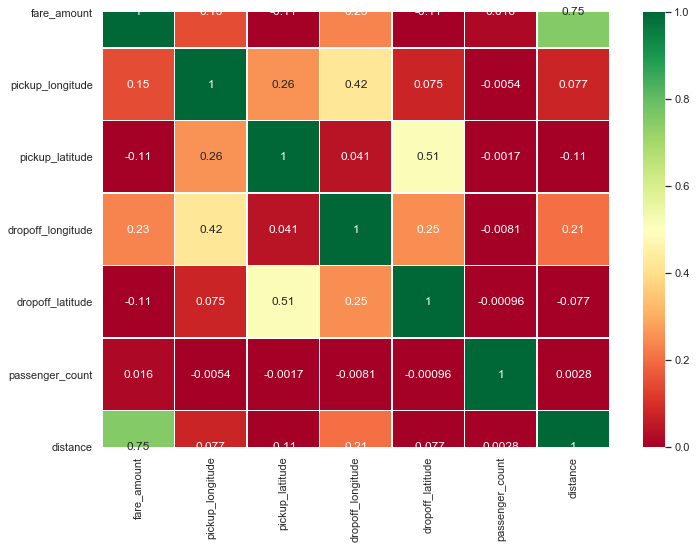

In [120]:
sns.set(rc={'figure.figsize':(12,8)})
#cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count' , 'distance']
# heat_map_corr = train_cab[cnames].corr()
sns.heatmap(heat_map_corr, vmin=-0.00, vmax=1.00, annot=True,cmap='RdYlGn',linewidths=.5,square=True) #sns.diverging_palette(220, 10, as_cmap=True)

In [121]:
# Anova Test is performed between catcnames (categorical independent variables) & fare_amount(numeric target variable) 

import statsmodels.api as sm

from statsmodels.formula.api import ols

for i in catcnames:
    mod = ols('fare_amount' + '~' + i, data = train_cab).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)
    
# From the anova result, we can observe Date ,Dayofweel (weekdays of month)

# has p value > 0.05, so delete these variables not to be considered in model.

                 sum_sq       df           F        PR(>F)
Year        9904.112999      1.0  339.257412  5.523992e-75
Residual  466512.211577  15980.0         NaN           NaN
                 sum_sq       df          F    PR(>F)
Month        642.010529      1.0  21.563435  0.000003
Residual  475774.314046  15980.0        NaN       NaN
                 sum_sq       df         F    PR(>F)
Date          29.052553      1.0  0.974543  0.323565
Residual  476387.272023  15980.0       NaN       NaN
                  sum_sq       df         F    PR(>F)
Dayofweek     140.561729      1.0  4.716126  0.029896
Residual   476275.762847  15980.0       NaN       NaN
                 sum_sq       df          F    PR(>F)
Hour         573.736899      1.0  19.267539  0.000011
Residual  475842.587676  15980.0        NaN       NaN
                 sum_sq       df         F    PR(>F)
Minutes      226.205720      1.0  7.591017  0.005873
Residual  476190.118855  15980.0       NaN       NaN
                 su

In [122]:
Drop_Catvar = ['Date', 'Dayofweek','Minutes','Seconds']

train_cab = train_cab.drop(Drop_Catvar , axis = 1)
test_cab = test_cab.drop(Drop_Catvar , axis = 1)

In [123]:
##https://trainingdatascience.com/workshops/histograms-and-skewed-data/

In [124]:
################Feature Scaling:#############

In [125]:
 # To check Skewness will use pandas skew() function

# skewness along the index axis 
train_cab.skew(axis = 0, skipna = True)
print(train_cab.kurtosis())

fare_amount          0.029162
pickup_longitude     0.167683
pickup_latitude      0.297189
dropoff_longitude    0.230199
dropoff_latitude     0.241098
passenger_count      3.223284
Year                -1.145842
Month               -1.198276
Hour                -0.798531
distance            -0.034922
dtype: float64


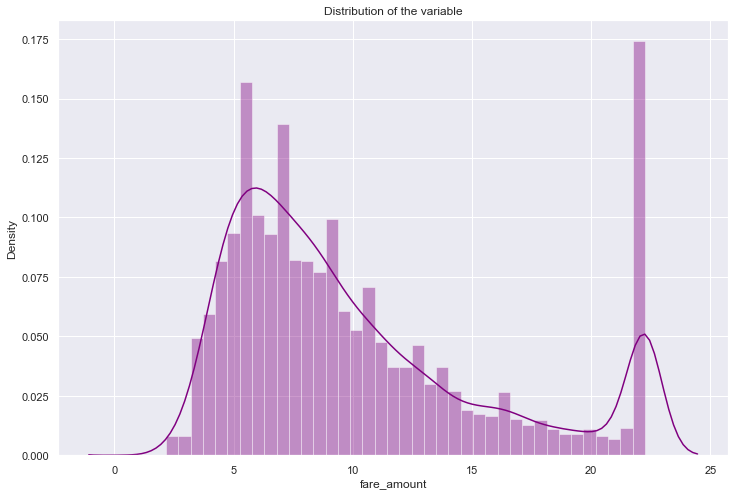

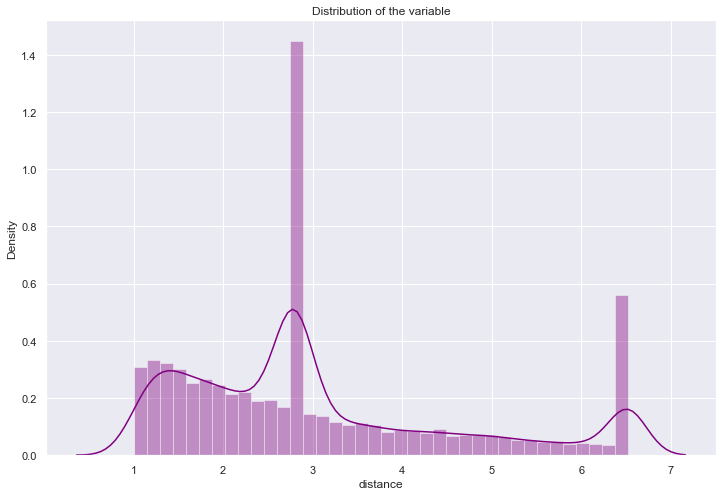

In [126]:
#A skewness value of 0 in the output denotes a symmetrical distribution.

#A negative skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

#A positive skewness value in the output indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution

#Numeric variables "fare amount" and "distance" are highly skewed.
cnames2 = ['fare_amount', 'distance']

for i in cnames2:
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(train_cab[i],bins='auto',color='Purple')
    plt.title("Distribution of the variable")
    plt.ylabel("Density")
    plt.show()

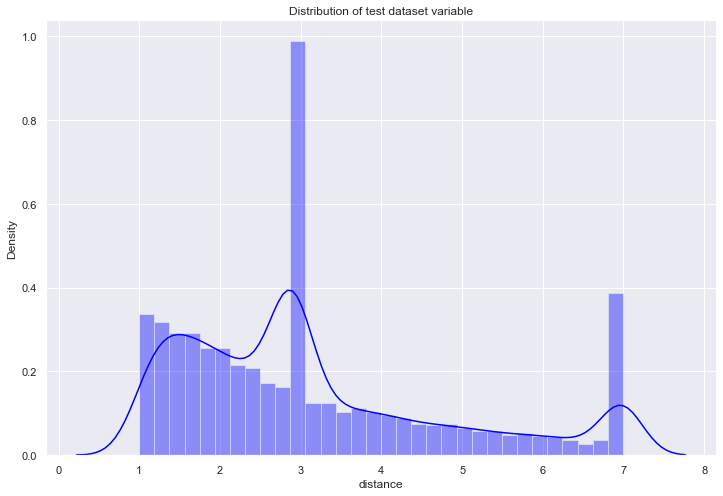

In [128]:
cnamestest = [ 'distance']
for i in cnamestest:
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(test_cab[i],bins='auto',color='Blue')
    plt.title("Distribution of test dataset variable")
    plt.ylabel("Density")
    plt.show()

In [129]:
# Using log function to reduce the skewness in distance

train_cab['fare_amount'] = np.log(train_cab['fare_amount']) # uses Natural Logarithm (mathematical const e=2.7182818)
train_cab['distance'] = np.log(train_cab['distance'])

In [130]:
# Using log function to reduce the skewness in distance (test dataset)

test_cab['distance'] = np.log(test_cab['distance']) # uses Natural Logarithm (mathematical const e=2.7182818)

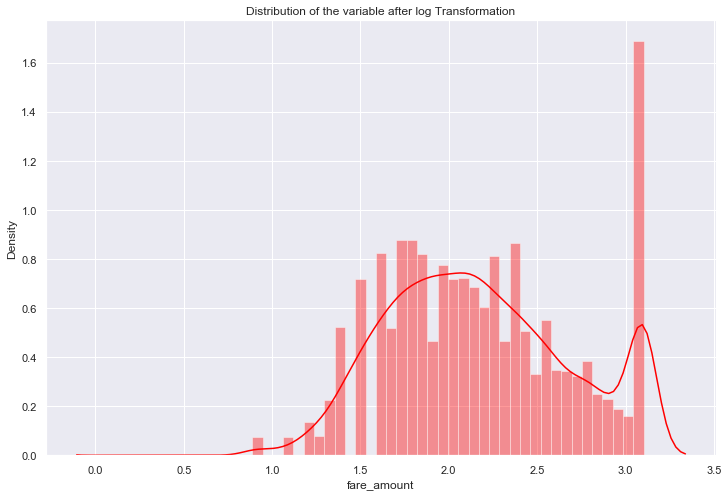

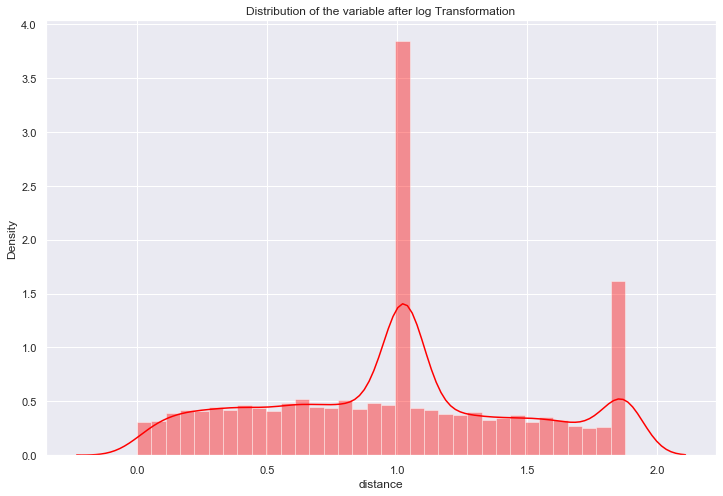

In [131]:
cnames2 = ['fare_amount', 'distance']

for i in cnames2:
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(train_cab[i],bins='auto',color='Red')
    plt.title("Distribution of the variable after log Transformation")
    plt.ylabel("Density")
    plt.show()

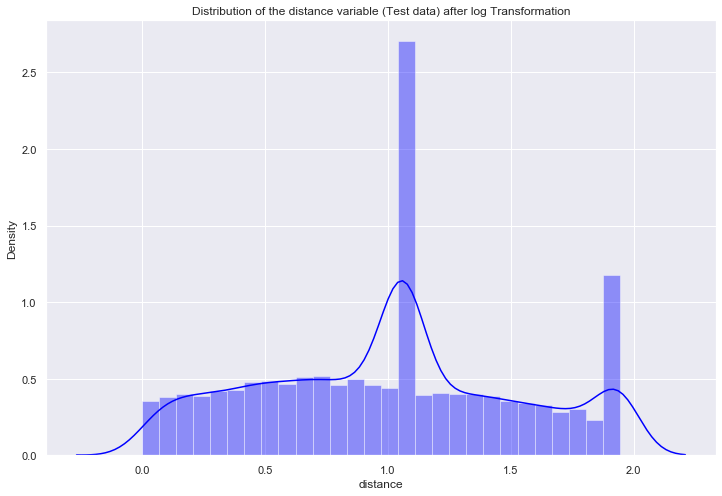

In [132]:
cnames2 = ['distance']

for i in cnames2:
    sns.set(rc={'figure.figsize':(12,8)})
    sns.distplot(test_cab[i],bins='auto',color='blue')
    plt.title("Distribution of the distance variable (Test data) after log Transformation")
    plt.ylabel("Density")
    plt.show()

In [133]:
train_cab.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Year                 float64
Month                float64
Hour                 float64
distance             float64
dtype: object

In [134]:
#######-------------MODEL DEVELOPMENT-----------------#######

In [135]:
# Load Required libraries for model development 

# For Machine learning 

from sklearn.model_selection import train_test_split #used to split dataset into train and test

from sklearn.metrics import mean_squared_error # used to calculate MSE

from sklearn.metrics import r2_score # used to calculate r square

from sklearn.linear_model import LinearRegression # For linear regression

from sklearn.tree import DecisionTreeRegressor # For Decision Tree

from sklearn.ensemble import RandomForestRegressor # For RandomForest

from sklearn import metrics

In [136]:
# Before developing the model lets check the dimensions of data 
train_cab.shape

(15982, 10)

In [137]:
train_cab.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year',
       'Month', 'Hour', 'distance'],
      dtype='object')

In [138]:
# Lets Divide the data into train and test set 

# Lets seperate independent and dependent variables 
X, y = train_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count',
               'Year','Month','Hour','distance']], train_cab['fare_amount']

#y = train_cab['fare_amount']

In [139]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train_cab.iloc[:, train_cab.columns != 'fare_amount'], 
                         train_cab.iloc[:, 0], test_size = 0.20, random_state = 1)

In [140]:
# Now Split the data into train and test using train_test_split function
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [141]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12785, 9)
(3197, 9)
(12785,)
(3197,)


In [142]:
train_cab.columns.get_loc('distance')

9

In [143]:
#################Linear Regression Model :###############

In [144]:
# lets create a object lm to build linear regression model 
lm = LinearRegression()

In [145]:
# fitting or building  a linear regression model 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
#lets print the intercept 
print(lm.intercept_)

160.3134337193143


In [147]:
#lets print the coefficients of linear regression
lm.coef_

array([ 8.60002286e-01, -5.80261893e-01,  1.47897983e+00, -1.02104837e+00,
        7.47629383e-03,  3.95001584e-02,  7.49243530e-03,  5.48890458e-04,
        6.28467982e-01])

In [148]:
# Lets check independent variables of train data set
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Hour',
       'distance'],
      dtype='object')

In [149]:
# Lets print the summary model
summary_LR_Model = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [150]:
summary_LR_Model

,coeff
pickup_longitude,0.860002
pickup_latitude,-0.580262
dropoff_longitude,1.478980
dropoff_latitude,-1.021048
passenger_count,0.007476
Year,0.039500
Month,0.007492
Hour,0.000549
distance,0.628468


In [151]:
# Predictions on train data 
predictions_train_LR =lm.predict(X_train)

print(predictions_train_LR) # these values are our predicted fare amount 

[2.12431753 1.79619201 2.21073004 ... 2.45535016 2.41215048 1.76955658]


In [152]:
# Predictions on test data 
predictions_test_LR =lm.predict(X_test)

print(predictions_test_LR) # these values are our predicted fare amount 

[2.26619024 1.9709658  2.14593819 ... 1.84108658 2.50033162 2.36864019]


In [153]:
# lets have a glance on target variable actual values 
y_test.head()

1800     2.351375
13954    2.525729
7223     1.410987
12325    1.410987
1410     2.197225
Name: fare_amount, dtype: float64

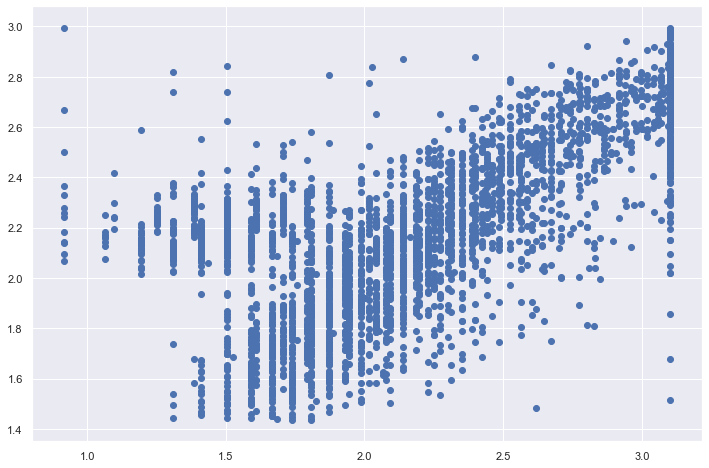

In [154]:
# Lets plot the actuals and predicted target variables 
plt.scatter(y_test,predictions_test_LR)

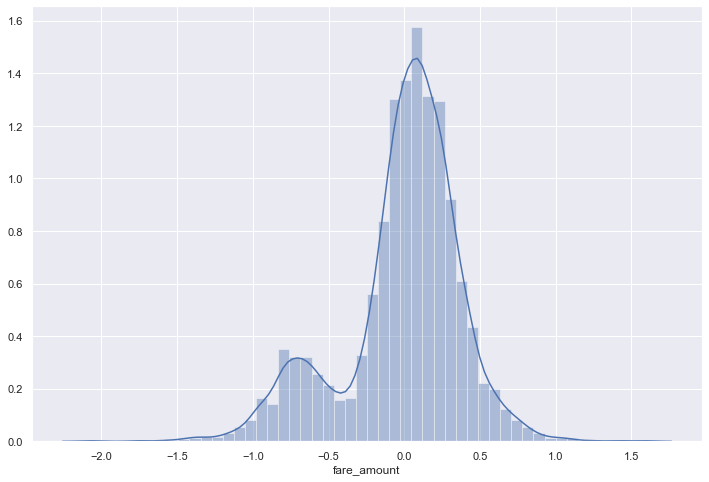

In [155]:
# lets check the distribution of our predictions
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot((y_test-predictions_test_LR))

In [156]:
##########Regression Evaluation metrics :##############
#RMSE, R-square, MAPE

In [157]:
RMSE_train_LR = np.sqrt(metrics.mean_squared_error(y_train,predictions_train_LR))

print(RMSE_train_LR)

0.3806780717547196


In [158]:
RMSE_test_LR = np.sqrt(metrics.mean_squared_error(y_test,predictions_test_LR))

print(RMSE_test_LR)

0.39251920076109237


In [159]:
r2_train_LR = metrics.r2_score(y_train,predictions_train_LR)

print(r2_train_LR)

0.44796571639084226


In [160]:
r2_test_LR = metrics.r2_score(y_test,predictions_test_LR)

print(r2_test_LR)

0.43919881052711307


In [161]:
MAE_train_LR = metrics.mean_absolute_error(y_train,predictions_train_LR)
print(MAE_train_LR)

0.2795920876940309


In [162]:
MAE_test_LR = metrics.mean_absolute_error(y_test,predictions_test_LR)
print(MAE_test_LR)

0.28763011089044876


In [163]:
# Calculate MAPE
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape

In [164]:
MAPE_train_LR = MAPE(y_train,predictions_train_LR)

print(MAPE_train_LR) 

0.14953589187354896


In [165]:
MAPE_test_LR = MAPE(y_test,predictions_test_LR)

print(MAPE_test_LR) 

0.1554777932460147


In [166]:
LR_Results = {'RMSE_LR':0.386,'r2_LR':0.430,'MAE_LR':0.280,'MAPE_LR':0.151}
print(LR_Results)

{'RMSE_LR': 0.386, 'r2_LR': 0.43, 'MAE_LR': 0.28, 'MAPE_LR': 0.151}


In [167]:
##################Decision Tree Model :####################

In [168]:
# Building DTModel on training data
fit_DT  = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [169]:
fit_DT

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [170]:
# Apply model on train data
predictions_train_DT = fit_DT.predict(X_train)
predictions_train_DT

array([1.70865925, 1.99430251, 1.99430251, ..., 2.44136761, 2.44136761,
       1.99430251])

In [171]:
# Apply model on test data
predictions_test_DT = fit_DT.predict(X_test)
predictions_test_DT

array([1.99430251, 1.99430251, 1.70865925, ..., 1.99430251, 2.44136761,
       2.44136761])

In [172]:
RMSE_train_DT = np.sqrt(metrics.mean_squared_error(y_train,predictions_train_DT))

print(RMSE_train_DT)

0.3302461601231565


In [173]:
RMSE_test_DT = np.sqrt(metrics.mean_squared_error(y_test,predictions_test_DT))

print(RMSE_test_DT)

0.33462923299171726


In [174]:
r2_train_DT = metrics.r2_score(y_train,predictions_train_DT)

print(r2_train_DT)

0.5845431904364943


In [175]:
r2_test_DT = metrics.r2_score(y_test,predictions_test_DT)

print(r2_test_DT)

0.5924181180256959


In [176]:
MAE_train_DT = metrics.mean_absolute_error(y_train,predictions_train_DT)
print(MAE_train_DT)

0.2504480186902473


In [177]:
MAE_test_DT = metrics.mean_absolute_error(y_test,predictions_test_DT)
print(MAE_test_DT)

0.2530363955906456


In [178]:
MAPE_train_DT = MAPE(y_train,predictions_train_DT)

print(MAPE_train_DT)

0.12525250547366265


In [179]:
MAPE_test_DT = MAPE(y_test,predictions_test_DT)

print(MAPE_test_DT)

0.12677686067056357


In [180]:
DT_Results = {'RMSE_DT':0.332,'r2_DT':0.577,'MAE_DT':0.250,'MAPE_DT': 0.124}

print(DT_Results)

{'RMSE_DT': 0.332, 'r2_DT': 0.577, 'MAE_DT': 0.25, 'MAPE_DT': 0.124}


In [181]:
#############Random Forest Model :###################

In [182]:
# Building RFModel on training data

RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)

In [183]:
# Apply model on train data

predictions_train_RF = RFModel.predict(X_train)
predictions_train_RF

array([1.67136175, 1.74508061, 2.15192899, ..., 2.61745529, 2.64013394,
       1.99320468])

In [184]:
# Apply model on test data

predictions_test_RF = RFModel.predict(X_test)
predictions_test_RF

array([2.33545147, 2.21740363, 1.633833  , ..., 1.86998241, 2.64896223,
       2.60841115])

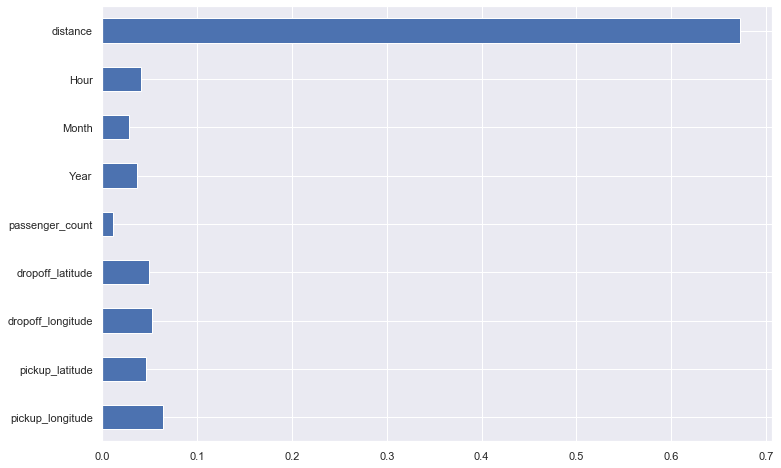

In [185]:
#Printing Feature importance of the model
feat_importances = pd.Series(RFModel.feature_importances_, index=X_train.columns)
feat_importances.plot(kind='barh')

In [186]:
RMSE_train_RF = np.sqrt(metrics.mean_squared_error(y_train,predictions_train_RF))

print(RMSE_train_RF)

0.10090100617949847


In [187]:
RMSE_test_RF = np.sqrt(metrics.mean_squared_error(y_test,predictions_test_RF))

print(RMSE_test_RF)

0.27543372440929376


In [188]:
r2_train_RF = metrics.r2_score(y_train,predictions_train_RF)

print(r2_train_RF)

0.961217006945598


In [189]:
r2_test_RF = metrics.r2_score(y_test,predictions_test_RF)

print(r2_test_RF)

0.72386507189303


In [190]:
MAE_train_RF = metrics.mean_absolute_error(y_train,predictions_train_RF)

print(MAE_train_RF)

0.06799109726943493


In [191]:
MAE_test_RF = metrics.mean_absolute_error(y_test,predictions_test_RF)

print(MAE_test_RF)

0.18371748261153378


In [192]:
MAPE_train_RF = MAPE(y_train,predictions_train_RF) 

print(MAPE_train_RF) #20% error

0.03499439636379196


In [193]:
MAPE_test_RF = MAPE(y_test,predictions_test_RF) 

print(MAPE_test_RF) #20% error

0.09421637223250041


In [194]:
RF_Results = {'RMSE_RF':0.268,'r2_RF':0.724,'MAE_RF':0.184,'MAPE_RF': 0.093}

print(RF_Results)

{'RMSE_RF': 0.268, 'r2_RF': 0.724, 'MAE_RF': 0.184, 'MAPE_RF': 0.093}


In [195]:
##############ERROR EVALUATION MATRIX :##############

In [196]:
Error_Metrics = {'RMSE':[RMSE_test_LR, RMSE_test_DT, RMSE_test_RF],
                  'R2': [r2_test_LR,   r2_test_DT,   r2_test_RF],
                 'MAE': [MAE_test_LR,  MAE_test_DT,  MAE_test_RF],
                 'MAPE':[MAPE_test_LR, MAPE_test_DT, MAPE_test_RF],
                'Accuracy':[(1-MAPE_test_LR)*100, (1-MAPE_test_DT)*100, (1-MAPE_test_RF)*100]}
                 

Final_Results =pd.DataFrame(Error_Metrics,index = ['Linear Regression', 'Decision Tree', 'Random Forest']) 

print(Final_Results)

                       RMSE        R2       MAE      MAPE   Accuracy
Linear Regression  0.392519  0.439199  0.287630  0.155478  84.452221
Decision Tree      0.334629  0.592418  0.253036  0.126777  87.322314
Random Forest      0.275434  0.723865  0.183717  0.094216  90.578363


In [197]:
############Optimizing the results with parameters tuning :###############

In [198]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [199]:
#Random Hyperparameter Grid
#Random Search CV on Random Forest Model

In [201]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
#predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_test_RRF = best_model.predict(X_test)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_test_RRF))

#Calculating R^2
RRF_r2 = r2_score(y_test, predictions_test_RRF)

# Calculating MAE
RRF_MAE = metrics.mean_absolute_error(y_test,predictions_test_RRF)

# Calculating MAPE
RRF_MAPE = MAPE(y_test,predictions_test_RRF) 


print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('RMSE = ',RRF_rmse)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('MAE = ',RRF_MAE)
print('MAPE = ',RRF_MAPE)


Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
RMSE =  0.27372678970981873
R-squared = 0.73.
MAE =  0.18655215066487144
MAPE =  0.09543908915207068


In [202]:
#Grid Search CV for Random Forest Model

In [203]:
from sklearn.model_selection import GridSearchCV 

## Grid Search CV for random Forest model

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)

view_best_params_GRF = gridcv_rf.best_params_

best_model = gridcv_rf.best_estimator_

#Apply model on test data
predictions_test_GRF = best_model.predict(X_test)
#predictions_test_GRF = gridcv_rf.predict(X_test)

#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_test_GRF))
# Calculating R^2
GRF_r2 = r2_score(y_test, predictions_test_GRF)

# Calculating MAE
GRF_MAE = metrics.mean_absolute_error(y_test,predictions_test_GRF)

# Calculating MAPE
GRF_MAPE = MAPE(y_test,predictions_test_GRF)

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('RMSE = ',(GRF_rmse))
print('R-squared = {:0.2}.'.format(GRF_r2))
print('MAE = ',(GRF_MAE))
print('MAPE = ',(GRF_MAPE))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 9, 'n_estimators': 19}
RMSE =  0.2728769869435329
R-squared = 0.73.
MAE =  0.18607748619906056
MAPE =  0.09523143426618244


In [204]:
####From Final results we can freeze our data to Random forest model as it has optimum values of error evaluation metrics
#Model evaluation using new dataset test.csv

In [212]:
#Check names of dataset(no need of renaming variables)
test_cab.columns 
# we can see here there is no fare_amount varible we need to predict using RF_model

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Hour',
       'distance'],
      dtype='object')

In [206]:
#Check structure of dataset(data structure of each variable)
test_cab.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
Year                 float64
Month                float64
Hour                 float64
distance             float64
dtype: object

In [213]:
# Change year, month, hour, minutes in to object data type; passenger_count into integer data type;

#Lets convert passenger_count into int64 data type.
test_cab['passenger_count'] = test_cab['passenger_count'].astype('int64')


# # Similarly convert year, month,hour,minute in to object data type.
# catcnames = ['Year', 'Month','Hour', 'Minutes']
# # cnames = ['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude',
# #            'passenger_count' , 'distance']

# for i in catcnames:
#     test_cab[i] = test_cab[i].astype('object')

In [208]:
test_cab.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
Year                 float64
Month                float64
Hour                 float64
distance             float64
dtype: object

In [209]:
# Lets check is there any outliers in this distance variable :
test_cab['distance'].describe()

count    9914.000000
mean        1.000100
std         0.526307
min         0.000068
25%         0.593084
50%         1.059367
75%         1.356495
max         1.944775
Name: distance, dtype: float64

In [210]:
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Hour,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015.0,1.0,13.0,0.842971
1,-73.986862,40.719383,-73.998886,40.739201,1,2015.0,1.0,13.0,0.885977
2,-73.982524,40.751260,-73.979654,40.746139,1,2011.0,10.0,11.0,1.059367
3,-73.981160,40.767807,-73.990448,40.751635,1,2012.0,12.0,21.0,0.673471
4,-73.966046,40.789775,-73.988565,40.744427,1,2012.0,12.0,21.0,1.684045


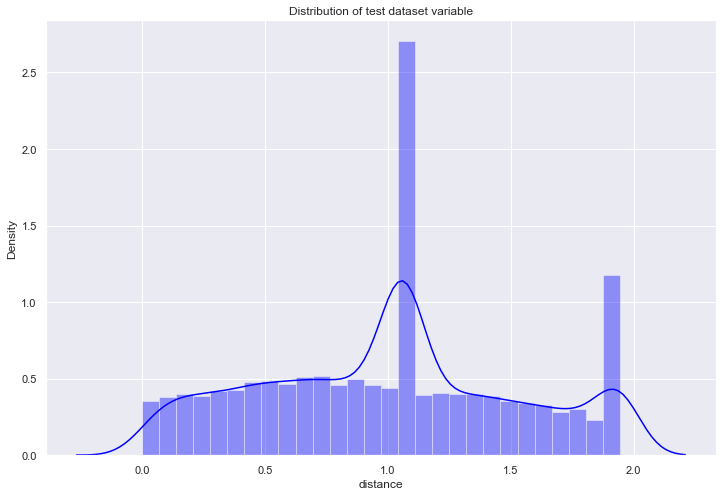

In [211]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(test_cab['distance'],bins='auto',color='Blue')
plt.title("Distribution of test dataset variable")
plt.ylabel("Density")
plt.show()

In [214]:
# Let's apply our RF model on test_cab data to predict Target variable fare_amount. 

predictions_test_cab = RFModel.predict(test_cab)

In [215]:
predictions_test_cab

array([2.22327572, 2.25911998, 2.21586888, ..., 2.98116015, 2.96620744,
       2.0261583 ])

In [216]:
# Create new variable called Predicted_Fare_Amount in test_cab dataset:

test_cab['Predicted_Fare_Amount'] = predictions_test_cab

In [217]:
# Let's Preview the updated dataset with predicted fare amount: 
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015.0,1.0,13.0,0.842971,2.223276
1,-73.986862,40.719383,-73.998886,40.739201,1,2015.0,1.0,13.0,0.885977,2.259120
2,-73.982524,40.751260,-73.979654,40.746139,1,2011.0,10.0,11.0,1.059367,2.215869
3,-73.981160,40.767807,-73.990448,40.751635,1,2012.0,12.0,21.0,0.673471,2.273966
4,-73.966046,40.789775,-73.988565,40.744427,1,2012.0,12.0,21.0,1.684045,2.807947


In [218]:
#Note here, our distance variable value are not showing actual distances as they are in natural logarithm form. To get actual distance values, need to inverse the logarithemic distance values using numply exponential function i.e., np.exp()

In [219]:
# Using exp() function to bring back the actual values in distance variable.

test_cab['distance'] = np.exp(test_cab['distance'])

In [220]:
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015.0,1.0,13.0,2.323259,2.223276
1,-73.986862,40.719383,-73.998886,40.739201,1,2015.0,1.0,13.0,2.425353,2.259120
2,-73.982524,40.751260,-73.979654,40.746139,1,2011.0,10.0,11.0,2.884545,2.215869
3,-73.981160,40.767807,-73.990448,40.751635,1,2012.0,12.0,21.0,1.961033,2.273966
4,-73.966046,40.789775,-73.988565,40.744427,1,2012.0,12.0,21.0,5.387301,2.807947


In [221]:
test_cab['Predicted_Fare_Amount'] = np.exp(test_cab['Predicted_Fare_Amount'])

In [222]:
test_cab.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Hour,distance,Predicted_Fare_Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2015.0,1.0,13.0,2.323259,9.237541
1,-73.986862,40.719383,-73.998886,40.739201,1,2015.0,1.0,13.0,2.425353,9.574660
2,-73.982524,40.751260,-73.979654,40.746139,1,2011.0,10.0,11.0,2.884545,9.169373
3,-73.981160,40.767807,-73.990448,40.751635,1,2012.0,12.0,21.0,1.961033,9.717869
4,-73.966046,40.789775,-73.988565,40.744427,1,2012.0,12.0,21.0,5.387301,16.575849


In [223]:
#save output results 
test_cab.to_csv("Predicted_Cab_Fare_on_test_cab.csv", index = False)